#About the Hackathon
* Given the disruption of production conditions and the rising variability in yield caused by climate change
*  By proactively anticipating the influence of climate change on commodity yields, we can gain a deeper understanding of its effects on raw material prices, thereby ensuring sustainability and mitigating risks throughout the supply chains

**the hackathon requires participants to focus on developing ML models that can forecast the effects of climate change on commodity prices**

* forecast the effect of climate change on commodity prices

#library

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import pandas as pd
import numpy as np
from xgboost import XGBRFRegressor
from sklearn.metrics import mean_squared_log_error, mean_squared_error
from sklearn.model_selection import train_test_split

#check availale datasets

In [ ]:
!unzip '/content/drive/MyDrive/machine_hack/sustanability hackathon/Participants_Data_GGSH_Solution_Notebook.zip'

Archive:  /content/drive/MyDrive/machine_hack/sustanability hackathon/Participants_Data_GGSH_Solution_Notebook.zip
  inflating: submission.csv          
  inflating: Solution_Notebook_GGSH.ipynb  
  inflating: USA_Commodity_prices.csv  
  inflating: USA_test.csv            
  inflating: __MACOSX/._USA_test.csv  
  inflating: USA_train.csv           
  inflating: India_train.csv         
  inflating: India_test.csv          
  inflating: __MACOSX/._India_test.csv  
  inflating: India_soil_rainfall_30years.csv  


In [ ]:
#train consisit of year,state,district,area,production,yeild,precipittation in each month

* we have 12 columns for each month for The precipitation (rainfall)
* 12 columns minimum temperature in each month
* 12 columns max temperature in each month
* 12 columns of water deficit (insufficient water)
* 12 columns for water availability in each month
* 12 months The potential water availability

The sowing season of cotton varies considerably from tract to tract and is
generally early (April-May) in northern India and is delayed as we proceed to down south
(monsoon based in southern zone). Cotton is a Kharif crop in the major parts of the
country viz. Punjab, Haryana, Rajasthan, Uttar Pradesh, Madhya Pradesh, Gujarat,
Maharashtra and parts of Andhra Pradesh & Karnataka. In these areas, the irrigated crop
is sown from March-May and the rain fed crop in June-July with the commencement of
the monsoon. In Tamil Nadu, the major portion of the irrigated and rain fed crop is
planted in September-October, whereas the sowing of the rain fed crop in the southern
districts is extended up to November. In parts of Karnataka and Andhra Pradesh, the desi
cotton is usually sown in August-September. In addition, summer sowings in Tamil Nadu
are done during February-March. The sowings of cotton in the rice fallows of Andhra
Pradesh and Tamil Nadu extent from the second half of December to the middle of
January


        * Year: The year of the data record.
      State Name: The name of the state where the data is recorded.
      Dist Name: The name of the district within the state where the data is recorded.
      COTTON AREA (1000 ha): The area of land used for cotton cultivation in thousands of hectares.
      COTTON PRODUCTION (1000 tons): The amount of cotton produced in thousands of tons.
      COTTON YIELD (Kg per ha): The yield of cotton per hectare in kilograms.
      JANUARY PRECIPITATION (Millimeters): The precipitation (rainfall) in millimeters during January.
      FEBRUARY PRECIPITATION (Millimeters): The precipitation (rainfall) in millimeters during February.
      MARCH PRECIPITATION (Millimeters): The precipitation (rainfall) in millimeters during March.
      APRIL PRECIPITATION (Millimeters): The precipitation (rainfall) in millimeters during April.
      MAY PRECIPITATION (Millimeters): The precipitation (rainfall) in millimeters during May.
      JUNE PRECIPITATION (Millimeters): The precipitation (rainfall) in millimeters during June.
      JULY PRECIPITATION (Millimeters): The precipitation (rainfall) in millimeters during July.
      AUGUST PRECIPITATION (Millimeters): The precipitation (rainfall) in millimeters during August.
      SEPTEMBER PRECIPITATION (Millimeters): The precipitation (rainfall) in millimeters during September.
      OCTOBER PRECIPITATION (Millimeters): The precipitation (rainfall) in millimeters during October.
      NOVEMBER PRECIPITATION (Millimeters): The precipitation (rainfall) in millimeters during November.
      DECEMBER PRECIPITATION (Millimeters): The precipitation (rainfall) in millimeters during December.
      JANUARY MINIMUM (Centigrade): The minimum temperature in degrees Celsius during January.
      FEBRUARY MINIMUM (Centigrade): The minimum temperature in degrees Celsius during February.
      MARCH MINIMUM (Centigrade): The minimum temperature in degrees Celsius during March.
      APRIL MINIMUM (Centigrade): The minimum temperature in degrees Celsius during April.
      MAY MINIMUM (Centigrade): The minimum temperature in degrees Celsius during May.
      JUNE MINIMUM (Centigrade): The minimum temperature in degrees Celsius during June.
      JULY MINIMUM (Centigrade): The minimum temperature in degrees Celsius during July.
      AUGUST MINIMUM (Centigrade): The minimum temperature in degrees Celsius during August.
      SEPTEMBER MINIMUM (Centigrade): The minimum temperature in degrees Celsius during September.
      OCTOBER MINIMUM (Centigrade): The minimum temperature in degrees Celsius during October.
      NOVEMBER MINIMUM (Centigrade): The minimum temperature in degrees Celsius during November.
      DECEMBER MINIMUM (Centigrade): The minimum temperature in degrees Celsius during December.
      JANUARY MAXIMUM (Centigrade): The maximum temperature in degrees Celsius during January.
      FEBRUARY MAXIMUM (Centigrade): The maximum temperature in degrees Celsius during February.
      MARCH MAXIMUM (Centigrade): The maximum temperature in degrees Celsius during March.
      APRIL MAXIMUM (Centigrade): The maximum temperature in degrees Celsius during April.
      MAY MAXIMUM (Centigrade): The maximum temperature in degrees Celsius during May.
      JUNE MAXIMUM (Centigrade): The maximum temperature in degrees Celsius during June.
      JULY MAXIMUM (Centigrade): The maximum temperature in degrees Celsius during July.
      AUGUST MAXIMUM (Centigrade): The maximum temperature in degrees Celsius during August.
      SEPTEMBER MAXIMUM (Centigrade): The maximum temperature in degrees Celsius during September.
      OCTOBER MAXIMUM (Centigrade): The maximum temperature in degrees Celsius during October.
      NOVEMBER MAXIMUM (Centigrade): The maximum temperature in degrees Celsius during November.
      DECEMBER MAXIMUM (Centigrade): The maximum temperature in degrees Celsius during December.
      JANUARY WATER DEFICIT (Millimeters): The water deficit in millimeters during January.
      FEBRUARY WATER DEFICIT (Millimeters): The water deficit in millimeters during February.
      MARCH WATER DEFICIT (Millimeters): The water deficit in millimeters during March.
      APRIL WATER DEFICIT (Millimeters): The water deficit in millimeters during April.
      MAY WATER DEFICIT (Millimeters): The water deficit in millimeters during May.
      JUNE WATER DEFICIT (Millimeters): The water deficit in millimeters during June.
      JULY WATER DEFICIT (Millimeters): The water deficit in millimeters during July.
      AUGUST WATER DEFICIT (Millimeters): The water deficit in millimeters during August.
      OCTOBER WATER DEFICIT (Millimeters): The water deficit in millimeters during October.
      NOVEMBER WATER DEFICIT (Millimeters): The water deficit in millimeters during November.
      DECEMBER WATER DEFICIT (Millimeters): The water deficit in millimeters during December.
      JANUARY ACTUAL (Millimeters): The actual water availability in millimeters during January.
      FEBRUARY ACTUAL (Millimeters): The actual water availability in millimeters during February.
      MARCH ACTUAL (Millimeters): The actual water availability in millimeters during March.
      APRIL ACTUAL (Millimeters): The actual water availability in millimeters during April.
      MAY ACTUAL (Millimeters): The actual water availability in millimeters during May.
      JUNE ACTUAL (Millimeters): The actual water availability in millimeters during June.
      JULY ACTUAL (Millimeters): The actual water availability in millimeters during July.
      AUGUST ACTUAL (Millimeters): The actual water availability in millimeters during August.
      SEPTEMBER ACTUAL (Millimeters): The actual water availability in millimeters during September.
      OCTOBER ACTUAL (Millimeters): The actual water availability in millimeters during October.
      NOVEMBER ACTUAL (Millimeters): The actual water availability in millimeters during November.
      DECEMBER ACTUAL (Millimeters): The actual water availability in millimeters during December.
      JANUARY POTENTIAL (Millimeters): The potential water availability in millimeters during January.
      FEBRUARY POTENTIAL (Millimeters): The potential water availability in millimeters during February.
      MARCH POTENTIAL (Millimeters): The potential water availability in millimeters during March.
      APRIL POTENTIAL (Millimeters): The potential water availability in millimeters during April.
      MAY POTENTIAL (Millimeters): The potential water availability in millimeters during May.
      JUNE POTENTIAL (Millimeters): The potential water availability in millimeters during June.
      JULY POTENTIAL (Millimeters): The potential water availability in millimeters during July.
      AUGUST POTENTIAL (Millimeters): The potential water availability in millimeters during August.
      SEPTEMBER POTENTIAL (Millimeters): The potential water availability in millimeters during September.
      OCTOBER POTENTIAL (Millimeters): The potential water availability in millimeters during October.
      NOVEMBER POTENTIAL (Millimeters): The potential water availability in millimeters during November.
      DECEMBER POTENTIAL (Millimeters): The potential water availability in millimeters during December.
      TOTAL AREA (1000 ha): The total area of land in thousands of hectares.
      FOREST AREA (1000 ha): The area of land covered by forests in thousands of hectares.
      BARREN AND UNCULTIVABLE LAND AREA (1000 ha): The area of barren and uncultivable land in thousands of hectares.
      LAND PUT TO NONAGRICULTURAL USE AREA (1000 ha): The area of land used for non-agricultural purposes in thousands of hectares.
      CULTIVABLE WASTE LAND AREA (1000 ha): The area of cultivable waste land in thousands of hectares.
      PERMANENT PASTURES AREA (1000 ha): The area of land used for permanent pastures in thousands of hectares.
      OTHER FALLOW AREA (1000 ha): The area of land under other fallow conditions in thousands of hectares.
      CURRENT FALLOW AREA (1000 ha): The area of land under current fallow conditions in thousands of hectares.
      NET CROPPED AREA (1000 ha): The net area of land used for crop cultivation in thousands of hectares.
      GROSS CROPPED AREA (1000 ha): The gross area of land used for crop cultivation in thousands of hectares.
      CROPPING INTENSITY (Percent): The percentage of cropped area to net cropped area.
      NITROGEN CONSUMPTION (tons): The amount of nitrogen fertilizer consumed in tons.
      NITROGEN SHARE IN NPK (Percent): The percentage of nitrogen in the total NPK (nitrogen, phosphorus, and potassium) fertilizer.
      NITROGEN PER HA OF NCA (Kg per ha): The amount of nitrogen fertilizer used per hectare of net cropped area in kilograms.
      NITROGEN PER HA OF GCA (Kg per ha): The amount of nitrogen fertilizer used per hectare of gross cropped area in kilograms.
      PHOSPHATE CONSUMPTION (tons): The amount of phosphate fertilizer consumed in tons.
      PHOSPHATE SHARE IN NPK (Percent): The percentage of phosphate in the total NPK (nitrogen, phosphorus, and potassium) fertilizer.
      PHOSPHATE PER HA OF NCA (Kg per ha): The amount of phosphate fertilizer used per hectare of net cropped area in kilograms.
      PHOSPHATE PER HA OF GCA (Kg per ha): The amount of phosphate fertilizer used per hectare of gross cropped area in kilograms.
      POTASH CONSUMPTION (tons): The amount of potash fertilizer consumed in tons.
      POTASH SHARE IN NPK (Percent): The percentage of potash in the total NPK (nitrogen, phosphorus, and potassium) fertilizer.
      POTASH PER HA OF NCA (Kg per ha): The amount of potash fertilizer used per hectare of net cropped area in kilograms.
      POTASH PER HA OF GCA (Kg per ha): The amount of potash fertilizer used per hectare of gross cropped area in kilograms.
      OTHER FERTILIZER CONSUMPTION (tons): The amount of other fertilizers (besides nitrogen, phosphate, and potash) consumed in tons.
      OTHER FERTILIZER PER HA OF NCA (Kg per ha): The amount of other fertilizers used per hectare of net cropped area in kilograms.
      OTHER FERTILIZER PER HA OF GCA (Kg per ha): The amount of other fertilizers used per hectare of gross cropped area in kilograms.

#data understading

* we have 3 datasets excluding submision and test dataset
* India_train.csv - 4705 x103,india data
* train consisit of year,state,district,area,production,yeild,precipittation in each month,climate details (temp,..)
* soil details

In [ ]:
# Load the data
india_train = pd.read_csv("India_train.csv")
india_test = pd.read_csv("India_test.csv")
usa_train = pd.read_csv("USA_train.csv")
usa_test = pd.read_csv("USA_test.csv")
soil_rainfall = pd.read_csv("India_soil_rainfall_30years.csv")
commodity = pd.read_csv("USA_Commodity_prices.csv")
submission = pd.read_csv("submission.csv")

**get relation between datasets**

* so the datasets have no connection one is information from india other from usa
* we need to predcit 3 values from a given test row
  * Yield (Pounds/ Harvested Area):
  * COTTON YIELD (Kg per ha) : The yield of cotton per hectare in kilograms.
  * Cotton_Price[Dollar/ton]

In [ ]:
5+5*14

75

In [ ]:
c_n= india_train.columns
r_n = c_n[77:]
r_n

Index(['TOTAL AREA (1000 ha)', 'FOREST AREA (1000 ha)',
       'BARREN AND UNCULTIVABLE LAND AREA (1000 ha)',
       'LAND PUT TO NONAGRICULTURAL USE AREA (1000 ha)',
       'CULTIVABLE WASTE LAND AREA (1000 ha)',
       'PERMANENT PASTURES AREA (1000 ha)', 'OTHER FALLOW AREA (1000 ha)',
       'CURRENT FALLOW AREA (1000 ha)', 'NET CROPPED AREA (1000 ha)',
       'GROSS CROPPED AREA (1000 ha)', 'CROPING INTENSITY (Percent)',
       'NITROGEN CONSUMPTION (tons)', 'NITROGEN SHARE IN NPK (Percent)',
       'NITROGEN PER HA OF NCA (Kg per ha)',
       'NITROGEN PER HA OF GCA (Kg per ha)', 'PHOSPHATE CONSUMPTION (tons)',
       'PHOSPHATE SHARE IN NPK (Percent)',
       'PHOSPHATE PER HA OF NCA (Kg per ha)',
       'PHOSPHATE PER HA OF GCA (Kg per ha)', 'POTASH CONSUMPTION (tons)',
       'POTASH SHARE IN NPK (Percent)', 'POTASH PER HA OF NCA (Kg per ha)',
       'POTASH PER HA OF GCA (Kg per ha)', 'TOTAL CONSUMPTION (tons)',
       'TOTAL PER HA OF NCA (Kg per ha)', 'TOTAL PER HA OF GCA (K

In [ ]:
len(r_n)

26

In [ ]:
submission.head()

,Yield (Pounds/ Harvested Area),COTTON YIELD (Kg per ha),Cotton_Price[Dollar/ton]
0,0.0,0,0.0
1,0.0,0,0.0
2,0.0,0,0.0
3,0.0,0,0.0
4,0.0,0,0.0


In [ ]:
commodity.head()

,Year,Cotton_Price[Dollar/ton]
0,1975,1055.792518
1,1976,1582.035312
2,1977,1399.933700
3,1978,1350.109288
4,1979,1428.152836


In [ ]:
usa_train.head()

,Year,State,Planted (1000 Acres),Harvested (1000 Acres),Yield (Pounds/ Harvested Area),Average Temperature Value,Average Temperature Anomaly,Maximum Temperature Value,Maximum Temperature Anomaly,Minimum Temperature Value,...,Heating Degree Days Value,Heating Degree Days Anomaly,Palmer Drought Severity Index (PDSI) Value,Palmer Drought Severity Index (PDSI) Anomaly,Palmer Hydrological Drought Index (PHDI) Value,Palmer Hydrological Drought Index (PHDI) Anomaly,Palmer Modified Drought Index (PMDI) Value,Palmer Modified Drought Index (PMDI) Anomaly,Palmer Z-Index Value,Palmer Z-Index Anomaly
0,1975,AL,385,370,406,66.825000,1.566667,75.066667,2.266667,54.566667,...,224.916667,-1.083333,8.161667,6.840833,NaN,4.684167,6.132500,5.821667,4.857500,2.718333
1,1975,NaN,700,680,486,63.875000,2.225000,73.808333,1.208333,52.975000,...,299.250000,8.750000,6.674167,6.331667,5.414167,4.894167,5.098333,3.680000,1.537500,3.382500
2,1975,AZ,NaN,268,1028,61.891667,-0.733333,74.483333,-0.291667,45.283333,...,211.166667,43.416667,0.584167,0.403333,1.584167,0.375000,1.140833,2.805000,3.648333,0.893333
3,1975,CA,900,875,1074,NaN,-0.383333,72.700000,-0.466667,46.825000,...,303.083333,NaN,2.650000,4.479167,1.613333,4.324167,1.405000,2.100833,3.068333,2.322500
4,1975,FL,4,4,347,73.208333,4.133333,83.983333,2.308333,64.408333,...,49.916667,-6.666667,1.191667,1.801667,4.085000,1.762500,2.155000,1.778333,3.239167,3.455833


In [ ]:
print(usa_test.shape)
print(india_test.shape)
usa_train.shape

(400, 25)
(2476, 103)


(560, 25)

In [ ]:
india_train.head()

,Year,State Name,Dist Name,COTTON AREA (1000 ha),COTTON PRODUCTION (1000 tons),COTTON YIELD (Kg per ha),JANUARY PERCIPITATION (Millimeters),FEBRUARY PERCIPITATION (Millimeters),MARCH PERCIPITATION (Millimeters),APRIL PERCIPITATION (Millimeters),...,PHOSPHATE SHARE IN NPK (Percent),PHOSPHATE PER HA OF NCA (Kg per ha),PHOSPHATE PER HA OF GCA (Kg per ha),POTASH CONSUMPTION (tons),POTASH SHARE IN NPK (Percent),POTASH PER HA OF NCA (Kg per ha),POTASH PER HA OF GCA (Kg per ha),TOTAL CONSUMPTION (tons),TOTAL PER HA OF NCA (Kg per ha),TOTAL PER HA OF GCA (Kg per ha)
0,1990,Andhra Pradesh,Srikakulam,0.0,0.0,0,4.05,50.75,75.34,18.87,...,23.32,19.79,15.90,1383.0,NaN,5.79,4.21,41684.0,85.21,67.77
1,1990,Andhra Pradesh,Visakhapatnam,7.0,3.0,3333,NaN,54.03,94.67,12.21,...,18.24,15.43,11.63,1363.0,4.03,5.67,3.11,44809.0,90.08,73.74
2,1990,Andhra Pradesh,East Godavari,49.0,238.0,4944,3.28,39.90,68.64,8.12,...,19.69,48.41,32.27,7882.0,6.86,19.71,13.31,NaN,303.24,194.95
3,1990,Andhra Pradesh,West Godavari,26.0,120.0,4964,4.14,43.94,48.83,5.39,...,NaN,89.59,64.73,18271.0,14.01,42.18,33.22,165898.0,375.97,266.35
4,1990,Andhra Pradesh,Krishna,996.0,289.0,2892,1.18,NaN,32.47,2.26,...,28.12,77.62,53.68,NaN,13.34,29.04,21.79,139778.0,NaN,193.57


In [ ]:
india_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4705 entries, 0 to 4704
Columns: 103 entries, Year to TOTAL PER HA OF GCA (Kg per ha)
dtypes: float64(99), int64(2), object(2)
memory usage: 3.7+ MB


In [ ]:
india_test.shape

(2476, 103)

In [ ]:
#check for missing data
percent_missing = india_train.isnull().sum() * 100/ len(india_train)
missing_value_train = pd.DataFrame({'column_name': india_train.columns,
                                  'percent_missing': percent_missing})
columns_to_drop = list(percent_missing[percent_missing >= 40].index)
missing_value_train=missing_value_train[missing_value_train.percent_missing>0
missing_value_train.sort_values(by="percent_missing",ascending=True)

In [ ]:
missing_value_train=missing_value_train[missing_value_train.percent_missing>0]

In [ ]:
missing_value_train

,column_name,percent_missing
COTTON AREA (1000 ha),COTTON AREA (1000 ha),5.674814
COTTON PRODUCTION (1000 tons),COTTON PRODUCTION (1000 tons),4.845909
JANUARY PERCIPITATION (Millimeters),JANUARY PERCIPITATION (Millimeters),4.590861
FEBRUARY PERCIPITATION (Millimeters),FEBRUARY PERCIPITATION (Millimeters),5.249734
MARCH PERCIPITATION (Millimeters),MARCH PERCIPITATION (Millimeters),5.526036
...,...,...
POTASH PER HA OF NCA (Kg per ha),POTASH PER HA OF NCA (Kg per ha),5.441020
POTASH PER HA OF GCA (Kg per ha),POTASH PER HA OF GCA (Kg per ha),5.058448
TOTAL CONSUMPTION (tons),TOTAL CONSUMPTION (tons),5.632306
TOTAL PER HA OF NCA (Kg per ha),TOTAL PER HA OF NCA (Kg per ha),5.568544


In [ ]:
#check for missing data
percent_missing = india_test.isnull().sum() * 100/ len(india_test)
missing_value_test = pd.DataFrame({'column_name': india_test.columns,
                                  'percent_missing': percent_missing})
columns_to_drop = list(percent_missing[percent_missing >= 40].index)
missing_value_test=missing_value_test[missing_value_test.percent_missing>0]
missing_value_test.sort_values(by="percent_missing",ascending=True)

,column_name,percent_missing
FOREST AREA (1000 ha),FOREST AREA (1000 ha),3.998384
PHOSPHATE PER HA OF GCA (Kg per ha),PHOSPHATE PER HA OF GCA (Kg per ha),4.038772
APRIL POTENTIAL (Millimeters),APRIL POTENTIAL (Millimeters),4.079160
LAND PUT TO NONAGRICULTURAL USE AREA (1000 ha),LAND PUT TO NONAGRICULTURAL USE AREA (1000 ha),4.321486
MAY ACTUAL (Millimeters),MAY ACTUAL (Millimeters),4.361874
...,...,...
MARCH WATER DEFICIT (Millimeters),MARCH WATER DEFICIT (Millimeters),5.775444
JUNE MAXIMUM (Centigrate),JUNE MAXIMUM (Centigrate),5.856220
MAY MAXIMUM (Centigrate),MAY MAXIMUM (Centigrate),5.856220
PHOSPHATE PER HA OF NCA (Kg per ha),PHOSPHATE PER HA OF NCA (Kg per ha),5.896607


* there are 99 columns in India train and test dataset with missing values

#check the target columns
* Yield (Pounds/ Harvested Area): The average yield of crops in pounds per harvested area.
* COTTON YIELD (Kg per ha) : The yield of cotton per hectare in kilograms
* **Cotton_Price[Dollar/ton]**

In [ ]:
#india_test['COTTON YIELD (Kg per ha)'].describe()
#cotton production (in kg) / cotton area(in ha)= yield of cotton field

In [ ]:
usa_train.head()

,Year,State,Planted (1000 Acres),Harvested (1000 Acres),Yield (Pounds/ Harvested Area),Average Temperature Value,Average Temperature Anomaly,Maximum Temperature Value,Maximum Temperature Anomaly,Minimum Temperature Value,...,Heating Degree Days Value,Heating Degree Days Anomaly,Palmer Drought Severity Index (PDSI) Value,Palmer Drought Severity Index (PDSI) Anomaly,Palmer Hydrological Drought Index (PHDI) Value,Palmer Hydrological Drought Index (PHDI) Anomaly,Palmer Modified Drought Index (PMDI) Value,Palmer Modified Drought Index (PMDI) Anomaly,Palmer Z-Index Value,Palmer Z-Index Anomaly
0,1975,AL,385,370,406,66.825000,1.566667,75.066667,2.266667,54.566667,...,224.916667,-1.083333,8.161667,6.840833,NaN,4.684167,6.132500,5.821667,4.857500,2.718333
1,1975,NaN,700,680,486,63.875000,2.225000,73.808333,1.208333,52.975000,...,299.250000,8.750000,6.674167,6.331667,5.414167,4.894167,5.098333,3.680000,1.537500,3.382500
2,1975,AZ,NaN,268,1028,61.891667,-0.733333,74.483333,-0.291667,45.283333,...,211.166667,43.416667,0.584167,0.403333,1.584167,0.375000,1.140833,2.805000,3.648333,0.893333
3,1975,CA,900,875,1074,NaN,-0.383333,72.700000,-0.466667,46.825000,...,303.083333,NaN,2.650000,4.479167,1.613333,4.324167,1.405000,2.100833,3.068333,2.322500
4,1975,FL,4,4,347,73.208333,4.133333,83.983333,2.308333,64.408333,...,49.916667,-6.666667,1.191667,1.801667,4.085000,1.762500,2.155000,1.778333,3.239167,3.455833


In [ ]:
india_test.head()

,Year,State Name,Dist Name,COTTON AREA (1000 ha),COTTON PRODUCTION (1000 tons),COTTON YIELD (Kg per ha),JANUARY PERCIPITATION (Millimeters),FEBRUARY PERCIPITATION (Millimeters),MARCH PERCIPITATION (Millimeters),APRIL PERCIPITATION (Millimeters),...,PHOSPHATE SHARE IN NPK (Percent),PHOSPHATE PER HA OF NCA (Kg per ha),PHOSPHATE PER HA OF GCA (Kg per ha),POTASH CONSUMPTION (tons),POTASH SHARE IN NPK (Percent),POTASH PER HA OF NCA (Kg per ha),POTASH PER HA OF GCA (Kg per ha),TOTAL CONSUMPTION (tons),TOTAL PER HA OF NCA (Kg per ha),TOTAL PER HA OF GCA (Kg per ha)
0,2007,Andhra Pradesh,Srikakulam,179.0,124.0,0,0.0,19.53,0.0,18.03,...,24.07,28.28,20.03,NaN,17.46,NaN,15.77,64007.0,134.94,97.83
1,2007,Andhra Pradesh,Visakhapatnam,39.0,27.0,0,0.0,9.90,0.0,16.02,...,21.71,20.29,16.25,6842.0,16.00,15.44,NaN,48839.0,107.11,85.50
2,2007,Andhra Pradesh,East Godavari,81.0,316.0,0,0.0,7.00,NaN,12.87,...,25.39,91.41,53.02,29651.0,21.68,68.70,39.54,158750.0,366.49,NaN
3,2007,Andhra Pradesh,West Godavari,49.0,309.0,0,0.0,5.13,NaN,8.27,...,30.09,149.91,96.38,50048.0,22.00,117.34,74.79,250292.0,568.85,355.04
4,2007,Andhra Pradesh,Krishna,3479.0,1956.0,0,0.0,6.71,0.0,9.97,...,29.03,NaN,74.52,32780.0,19.03,69.82,46.43,192459.0,408.09,264.86


#checking trend factor in target columns along with year

* Yield (Pounds/ Harvested Area): The average yield of crops in pounds per harvested area.
* COTTON YIELD (Kg per ha) : The yield of cotton per hectare in kilograms
* **Cotton_Price[Dollar/ton]**

* relation between cotton area ,cotton production and contton yield
 * cotton area - The area of land used for cotton cultivation in thousands of hectares.
 * cotton production -  The amount of cotton produced in thousands of tons

 * COTTON YIELD (Kg per ha) - The yield of cotton per hectare in kilograms


* 1 ton =1000 kg

https://wikifarmer.com/cotton-harvest-yields/

In [ ]:
india_train.head()

,Year,State Name,Dist Name,COTTON AREA (1000 ha),COTTON PRODUCTION (1000 tons),COTTON YIELD (Kg per ha),JANUARY PERCIPITATION (Millimeters),FEBRUARY PERCIPITATION (Millimeters),MARCH PERCIPITATION (Millimeters),APRIL PERCIPITATION (Millimeters),...,PHOSPHATE PER HA OF NCA (Kg per ha),PHOSPHATE PER HA OF GCA (Kg per ha),POTASH CONSUMPTION (tons),POTASH SHARE IN NPK (Percent),POTASH PER HA OF NCA (Kg per ha),POTASH PER HA OF GCA (Kg per ha),TOTAL CONSUMPTION (tons),TOTAL PER HA OF NCA (Kg per ha),TOTAL PER HA OF GCA (Kg per ha),y_in_ton
0,1990,Andhra Pradesh,Srikakulam,0.0,0.0,0,4.05,50.75,75.34,18.87,...,19.79,15.90,1383.0,NaN,5.79,4.21,41684.0,85.21,67.77,NaN
1,1990,Andhra Pradesh,Visakhapatnam,7.0,3.0,3333,NaN,54.03,94.67,12.21,...,15.43,11.63,1363.0,4.03,5.67,3.11,44809.0,90.08,73.74,9.000900
2,1990,Andhra Pradesh,East Godavari,49.0,238.0,4944,3.28,39.90,68.64,8.12,...,48.41,32.27,7882.0,6.86,19.71,13.31,NaN,303.24,194.95,481.391586
3,1990,Andhra Pradesh,West Godavari,26.0,120.0,4964,4.14,43.94,48.83,5.39,...,89.59,64.73,18271.0,14.01,42.18,33.22,165898.0,375.97,266.35,241.740532
4,1990,Andhra Pradesh,Krishna,996.0,289.0,2892,1.18,NaN,32.47,2.26,...,77.62,53.68,NaN,13.34,29.04,21.79,139778.0,NaN,193.57,999.308437


In [ ]:
3000/7

428.57142857142856

In [ ]:
#india_train['y_in_ton'] = india_train['COTTON PRODUCTION (1000 tons)']/india_train['COTTON YIELD (Kg per ha)'] *10000

In [ ]:
commodity.head()

,Year,Cotton_Price[Dollar/ton]
0,1975,1055.792518
1,1976,1582.035312
2,1977,1399.933700
3,1978,1350.109288
4,1979,1428.152836


In [ ]:
c_n = commodity[commodity.Year<2003]

In [ ]:
c_n[c_n.Year>2001]

In [ ]:
c_n

In [ ]:
commodity.Year.describe()

In [ ]:
india_train.Year.describe()

<ipython-input-34-6477a194614b>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  india_train.groupby(['Year'])['COTTON PRODUCTION (1000 tons)','COTTON YIELD (Kg per ha)'].sum().plot(figsize=(26,6))


<Axes: xlabel='Year'>

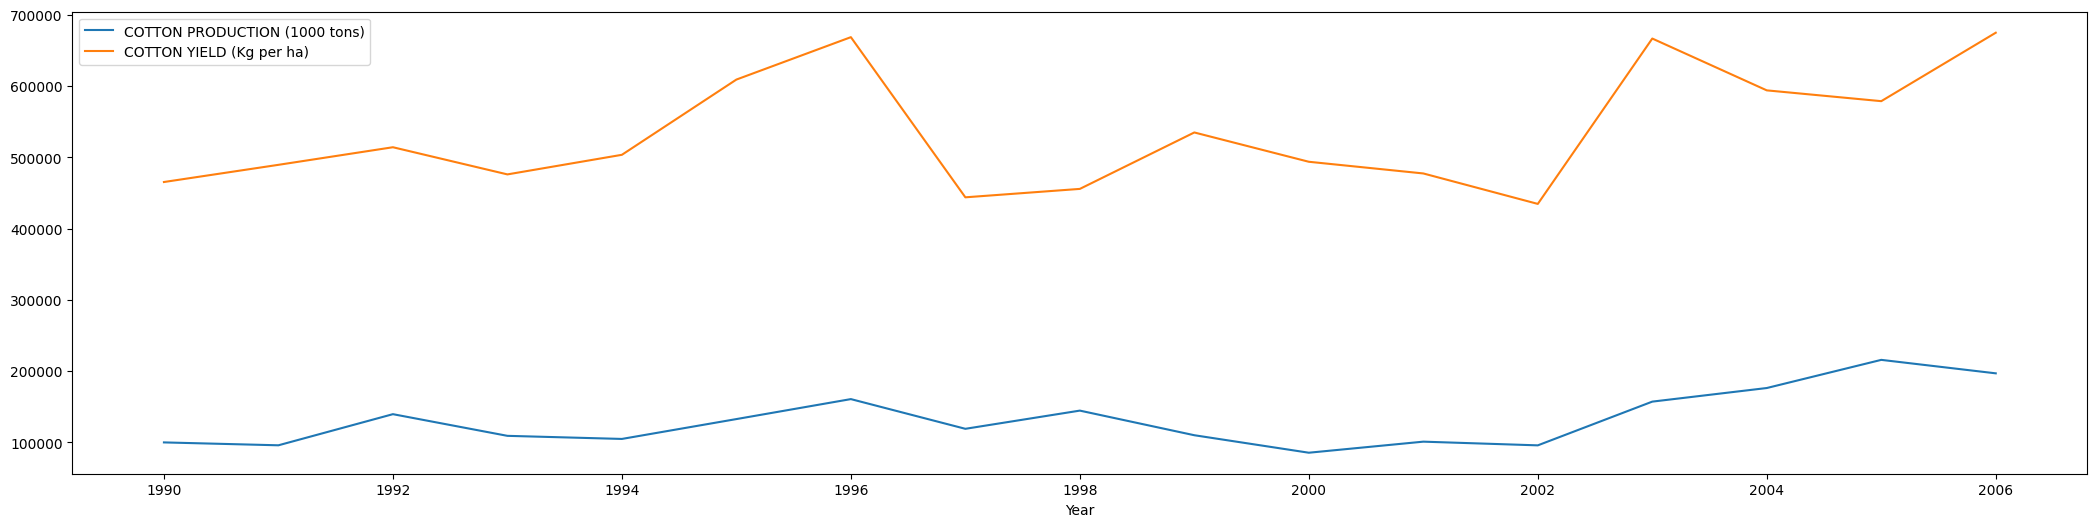

In [ ]:
india_train.groupby(['Year'])['COTTON PRODUCTION (1000 tons)','COTTON YIELD (Kg per ha)'].sum().plot(figsize=(26,6))

<Axes: xlabel='Year'>

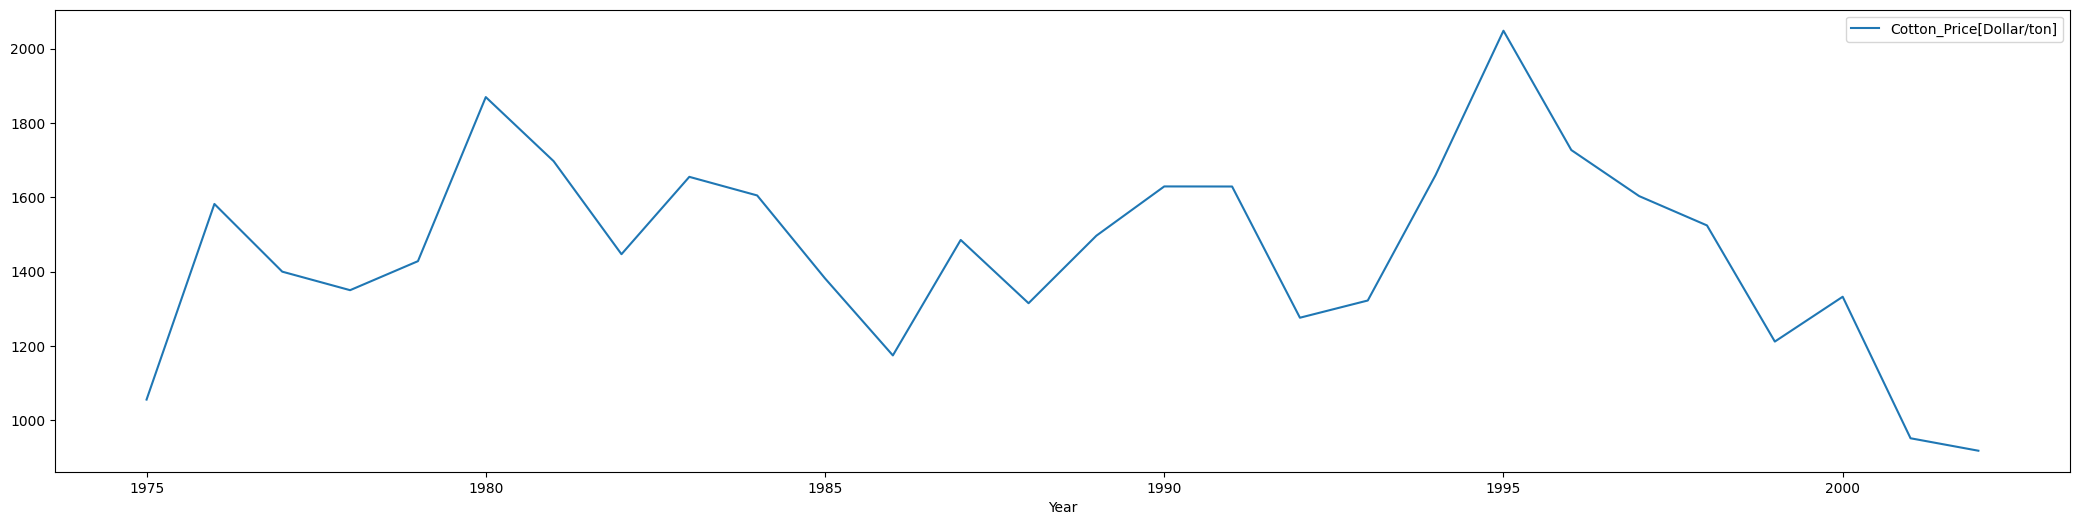

In [ ]:
# number of assets per periods in the universe
c_n.groupby(['Year'])['Cotton_Price[Dollar/ton]'].sum().plot(figsize=(26,6))

In [ ]:
#COTTON PRODUCTION (1000 tons)
commodity.groupby(['Year'])['Cotton_Price[Dollar/ton]'].sum().plot(figsize=(26,6))

# EDA

In [ ]:
import seaborn as sns

In [ ]:
india_train.head()

,Year,State Name,Dist Name,COTTON AREA (1000 ha),COTTON PRODUCTION (1000 tons),COTTON YIELD (Kg per ha),JANUARY PERCIPITATION (Millimeters),FEBRUARY PERCIPITATION (Millimeters),MARCH PERCIPITATION (Millimeters),APRIL PERCIPITATION (Millimeters),...,PHOSPHATE PER HA OF NCA (Kg per ha),PHOSPHATE PER HA OF GCA (Kg per ha),POTASH CONSUMPTION (tons),POTASH SHARE IN NPK (Percent),POTASH PER HA OF NCA (Kg per ha),POTASH PER HA OF GCA (Kg per ha),TOTAL CONSUMPTION (tons),TOTAL PER HA OF NCA (Kg per ha),TOTAL PER HA OF GCA (Kg per ha),COTTON YIELD (ton per ha)
0,1990,Andhra Pradesh,Srikakulam,0.0,0.0,0,4.05,50.75,75.34,18.87,...,19.79,15.90,1383.0,NaN,5.79,4.21,41684.0,85.21,67.77,0.000
1,1990,Andhra Pradesh,Visakhapatnam,7.0,3.0,3333,NaN,54.03,94.67,12.21,...,15.43,11.63,1363.0,4.03,5.67,3.11,44809.0,90.08,73.74,3.333
2,1990,Andhra Pradesh,East Godavari,49.0,238.0,4944,3.28,39.90,68.64,8.12,...,48.41,32.27,7882.0,6.86,19.71,13.31,NaN,303.24,194.95,4.944
3,1990,Andhra Pradesh,West Godavari,26.0,120.0,4964,4.14,43.94,48.83,5.39,...,89.59,64.73,18271.0,14.01,42.18,33.22,165898.0,375.97,266.35,4.964
4,1990,Andhra Pradesh,Krishna,996.0,289.0,2892,1.18,NaN,32.47,2.26,...,77.62,53.68,NaN,13.34,29.04,21.79,139778.0,NaN,193.57,2.892


In [ ]:
3333/1000

3.333

In [ ]:
india_train['COTTON YIELD (ton per ha)'] = (india_train['COTTON YIELD (Kg per ha)'])/1000

In [ ]:
india_train['Dist Name'].nunique()

279

In [ ]:
india_train.Year.value_counts()

1998    279
1997    279
2005    279
2004    279
2003    279
1999    279
2006    279
1994    279
1993    279
1992    279
1996    275
1995    275
2000    275
2001    275
2002    275
1991    270
1990    270
Name: Year, dtype: int64

In [ ]:
india_train['State Name'].value_counts()

Uttar Pradesh       731
Madhya Pradesh      578
Rajasthan           442
Maharashtra         391
Gujarat             289
Karnataka           255
West Bengal         204
Orissa              204
Punjab              170
Himachal Pradesh    170
Kerala              170
Telangana           153
Andhra Pradesh      153
Bihar               153
Tamil Nadu          136
Uttarakhand         136
Assam               135
Haryana             102
Chhattisgarh         85
Jharkhand            48
Name: State Name, dtype: int64

1149 



<ipython-input-74-6d2bb075774c>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(india_train['COTTON AREA (1000 ha)'],color="b");


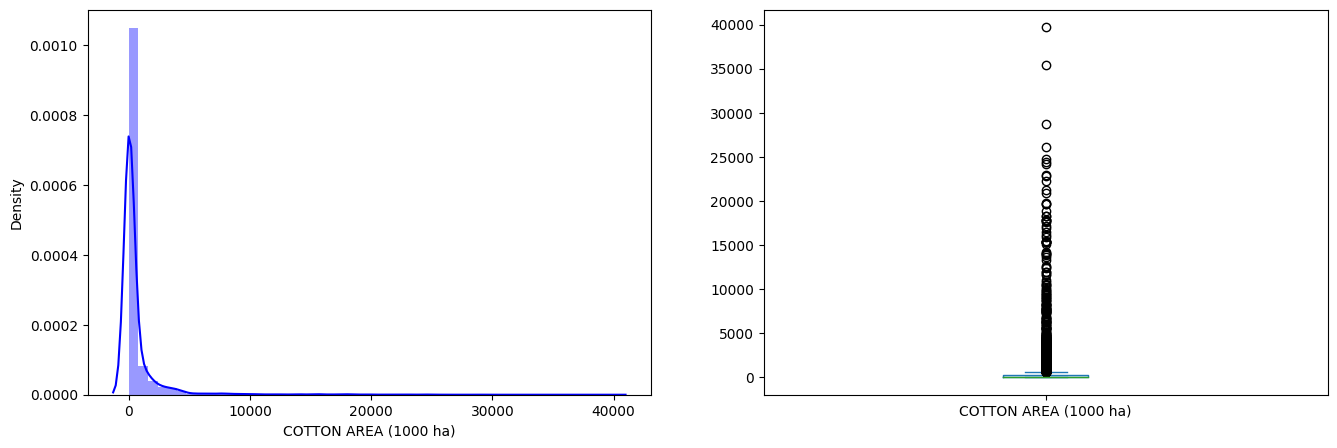

In [ ]:
print(india_train['COTTON AREA (1000 ha)'].nunique(),"\n")
plt.subplot(121)
sns.distplot(india_train['COTTON AREA (1000 ha)'],color="b");

plt.subplot(122)
india_train['COTTON AREA (1000 ha)'].plot.box(figsize=(16,5))

plt.show()

1034 



<ipython-input-75-0109a76943ff>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(india_train['COTTON PRODUCTION (1000 tons)'],color="r");


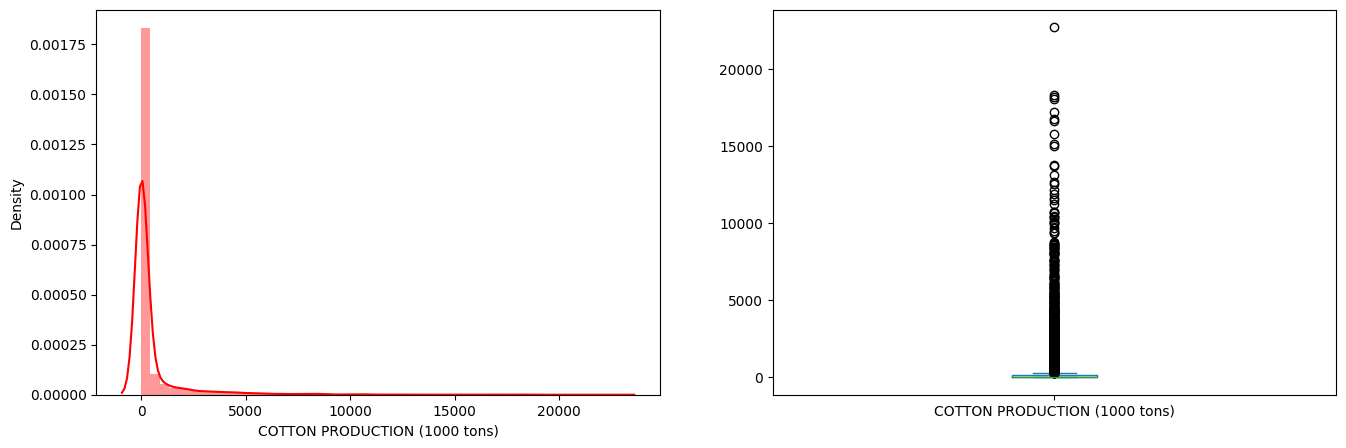

In [ ]:
print(india_train['COTTON PRODUCTION (1000 tons)'].nunique(),"\n")
plt.subplot(121)
sns.distplot(india_train['COTTON PRODUCTION (1000 tons)'],color="r");

plt.subplot(122)
india_train['COTTON PRODUCTION (1000 tons)'].plot.box(figsize=(16,5))

plt.show()

1301 



<ipython-input-76-0a8cd1e75b8b>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(india_train['COTTON YIELD (Kg per ha)'],color="y");


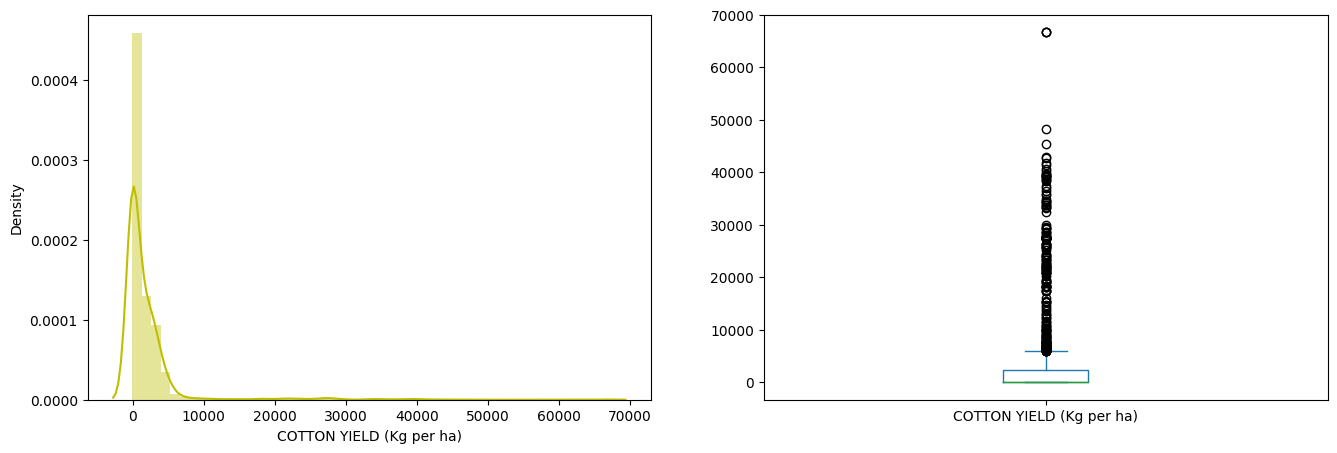

In [ ]:
print(india_train['COTTON YIELD (Kg per ha)'].nunique(),"\n")
plt.subplot(121)
sns.distplot(india_train['COTTON YIELD (Kg per ha)'],color="y");

plt.subplot(122)
india_train['COTTON YIELD (Kg per ha)'].plot.box(figsize=(16,5))

plt.show()

In [ ]:
india_train.describe()

,Year,COTTON AREA (1000 ha),COTTON PRODUCTION (1000 tons),COTTON YIELD (Kg per ha),JANUARY PERCIPITATION (Millimeters),FEBRUARY PERCIPITATION (Millimeters),MARCH PERCIPITATION (Millimeters),APRIL PERCIPITATION (Millimeters),MAY PERCIPITATION (Millimeters),JUNE PERCIPITATION (Millimeters),...,PHOSPHATE PER HA OF NCA (Kg per ha),PHOSPHATE PER HA OF GCA (Kg per ha),POTASH CONSUMPTION (tons),POTASH SHARE IN NPK (Percent),POTASH PER HA OF NCA (Kg per ha),POTASH PER HA OF GCA (Kg per ha),TOTAL CONSUMPTION (tons),TOTAL PER HA OF NCA (Kg per ha),TOTAL PER HA OF GCA (Kg per ha),COTTON YIELD (ton per ha)
count,4705.000000,4438.000000,4477.000000,4705.000000,4489.000000,4458.000000,4445.000000,4485.000000,4491.000000,4471.000000,...,4470.000000,4471.000000,4481.000000,4479.000000,4449.000000,4467.000000,4440.000000,4443.000000,4474.000000,4705.000000
mean,1998.025292,655.725327,501.854367,1929.775133,18.153555,16.186774,21.222115,27.203142,52.273295,155.832713,...,30.861284,22.573136,4415.581790,11.750246,13.755383,10.851428,49886.029955,122.181330,85.892845,1.929775
std,4.893509,2294.044035,1623.216667,4919.725762,25.831879,27.118176,28.666592,47.434857,91.043304,193.457432,...,24.060465,15.257428,6241.924452,10.083136,17.368442,12.656153,46381.811515,102.637837,63.090648,4.919726
min,1990.000000,-9.000000,-9.000000,-9.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.230000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.009000
25%,1994.000000,0.000000,0.000000,0.000000,3.190000,2.910000,3.680000,4.140000,7.560000,56.620000,...,14.270000,11.455000,428.000000,4.660000,4.060000,3.600000,16024.250000,50.250000,39.305000,0.000000
50%,1998.000000,4.000000,0.000000,0.000000,8.480000,6.830000,10.140000,8.820000,17.730000,102.990000,...,25.240000,19.920000,1881.000000,8.030000,7.450000,6.060000,39157.500000,92.010000,72.000000,0.000000
75%,2002.000000,225.750000,117.000000,2353.000000,23.830000,17.642500,28.630000,28.150000,55.685000,186.505000,...,40.567500,30.440000,5749.000000,16.065000,16.520000,13.300000,69162.500000,169.365000,121.525000,2.353000
max,2006.000000,39702.000000,22694.000000,66671.000000,235.750000,292.430000,247.210000,636.600000,763.050000,3251.370000,...,226.120000,143.030000,50904.000000,94.270000,253.760000,226.540000,375992.000000,826.060000,612.130000,66.671000


In [ ]:
india_train.head()

,Year,State Name,Dist Name,COTTON AREA (1000 ha),COTTON PRODUCTION (1000 tons),COTTON YIELD (Kg per ha),JANUARY PERCIPITATION (Millimeters),FEBRUARY PERCIPITATION (Millimeters),MARCH PERCIPITATION (Millimeters),APRIL PERCIPITATION (Millimeters),...,PHOSPHATE PER HA OF NCA (Kg per ha),PHOSPHATE PER HA OF GCA (Kg per ha),POTASH CONSUMPTION (tons),POTASH SHARE IN NPK (Percent),POTASH PER HA OF NCA (Kg per ha),POTASH PER HA OF GCA (Kg per ha),TOTAL CONSUMPTION (tons),TOTAL PER HA OF NCA (Kg per ha),TOTAL PER HA OF GCA (Kg per ha),cotton_ratio
0,1990,Andhra Pradesh,Srikakulam,0.0,0.0,0,4.05,50.75,75.34,18.87,...,19.79,15.90,1383.0,NaN,5.79,4.21,41684.0,85.21,67.77,NaN
1,1990,Andhra Pradesh,Visakhapatnam,7.0,3.0,3333,NaN,54.03,94.67,12.21,...,15.43,11.63,1363.0,4.03,5.67,3.11,44809.0,90.08,73.74,428.571429
2,1990,Andhra Pradesh,East Godavari,49.0,238.0,4944,3.28,39.90,68.64,8.12,...,48.41,32.27,7882.0,6.86,19.71,13.31,NaN,303.24,194.95,4857.142857
3,1990,Andhra Pradesh,West Godavari,26.0,120.0,4964,4.14,43.94,48.83,5.39,...,89.59,64.73,18271.0,14.01,42.18,33.22,165898.0,375.97,266.35,4615.384615
4,1990,Andhra Pradesh,Krishna,996.0,289.0,2892,1.18,NaN,32.47,2.26,...,77.62,53.68,NaN,13.34,29.04,21.79,139778.0,NaN,193.57,290.160643


In [ ]:
india_train['cotton_ratio'] = (india_train['COTTON PRODUCTION (1000 tons)']/india_train['COTTON AREA (1000 ha)'])*1000

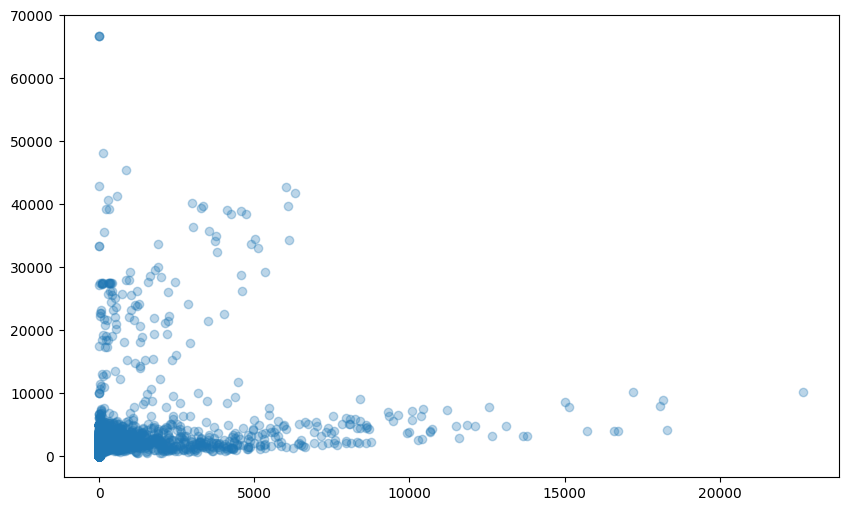

In [ ]:
plt.figure(figsize=(10,6))
plt.scatter(y=india_train['COTTON YIELD (Kg per ha)'],x=india_train['COTTON PRODUCTION (1000 tons)'],alpha=0.3)

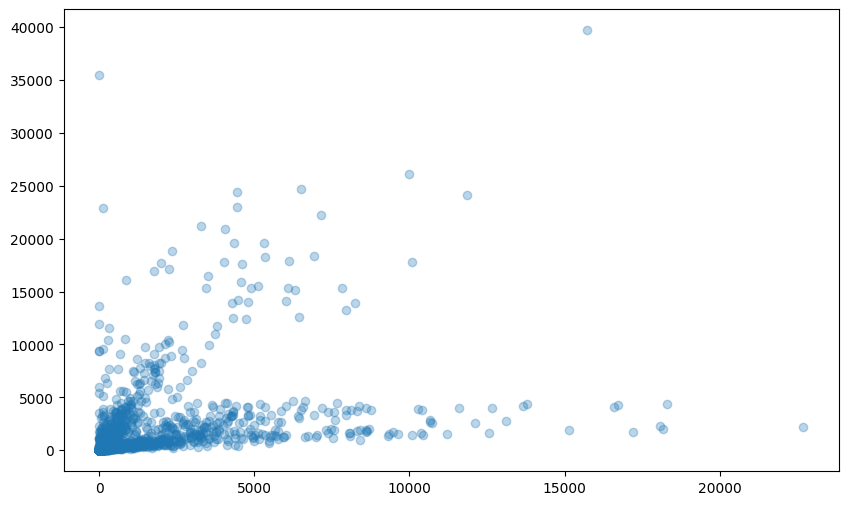

In [ ]:
plt.figure(figsize=(10,6))
plt.scatter(y=india_train['COTTON AREA (1000 ha)'],x=india_train['COTTON PRODUCTION (1000 tons)'],alpha=0.3)

We need to deep dive into the 3 variables relating to cotton
* There are negative values
* Cotton area and cotton production has 5% missing values
* Need to check anamoly values in it

Text(0, 0.5, 'yield')

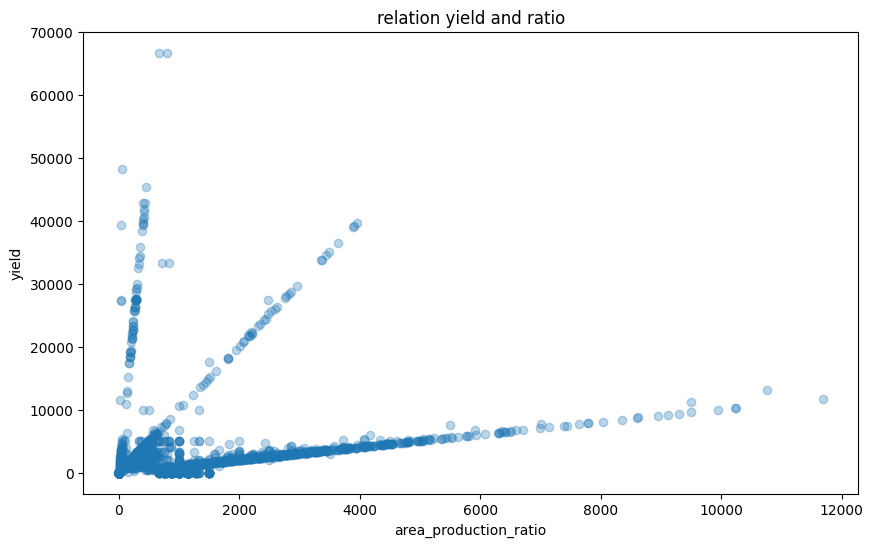

In [ ]:
plt.figure(figsize=(10,6))
plt.scatter(y=india_train['COTTON YIELD (Kg per ha)'],x=india_train['cotton_ratio'],alpha=0.3)
plt.title("relation yield and ratio")
plt.xlabel("area_production_ratio")
plt.ylabel("yield")

so the above graph is some what interesting
We need to the relation between the 3 variables with the help of these graph
Get close observation

* so there are 3 liner lines going,and some noice is also present

In [ ]:
india_train.shape

(4705, 104)

In [ ]:
#go for noise
y_b_10k = india_train[india_train['COTTON YIELD (Kg per ha)']<10000]
y_b_10k.shape

(4563, 104)

Text(0, 0.5, 'yield')

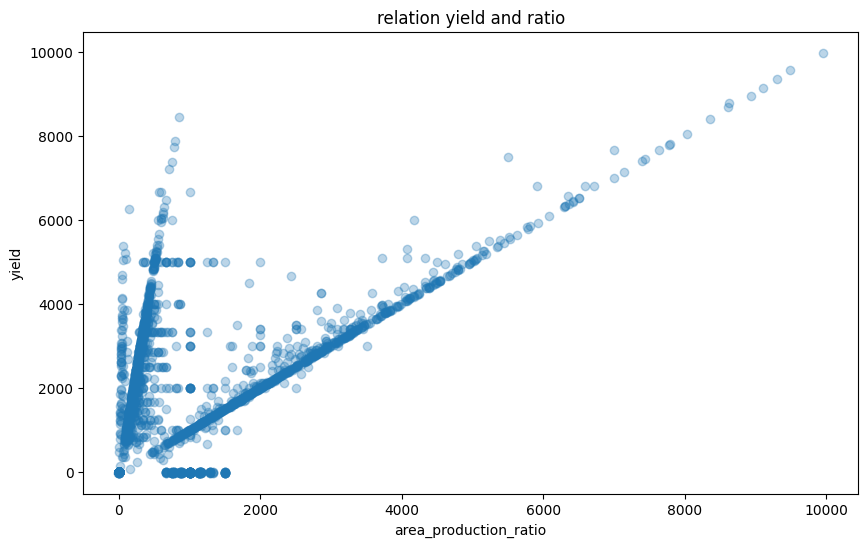

In [ ]:
plt.figure(figsize=(10,6))
plt.scatter(y=y_b_10k['COTTON YIELD (Kg per ha)'],x=y_b_10k['cotton_ratio'],alpha=0.3)
plt.title("relation yield and ratio")
plt.xlabel("area_production_ratio")
plt.ylabel("yield")

In [ ]:
india_train.head()

,Year,State Name,Dist Name,COTTON AREA (1000 ha),COTTON PRODUCTION (1000 tons),COTTON YIELD (Kg per ha),JANUARY PERCIPITATION (Millimeters),FEBRUARY PERCIPITATION (Millimeters),MARCH PERCIPITATION (Millimeters),APRIL PERCIPITATION (Millimeters),...,PHOSPHATE PER HA OF NCA (Kg per ha),PHOSPHATE PER HA OF GCA (Kg per ha),POTASH CONSUMPTION (tons),POTASH SHARE IN NPK (Percent),POTASH PER HA OF NCA (Kg per ha),POTASH PER HA OF GCA (Kg per ha),TOTAL CONSUMPTION (tons),TOTAL PER HA OF NCA (Kg per ha),TOTAL PER HA OF GCA (Kg per ha),cotton_ratio
0,1990,Andhra Pradesh,Srikakulam,0.0,0.0,0,4.05,50.75,75.34,18.87,...,19.79,15.90,1383.0,NaN,5.79,4.21,41684.0,85.21,67.77,NaN
1,1990,Andhra Pradesh,Visakhapatnam,7.0,3.0,3333,NaN,54.03,94.67,12.21,...,15.43,11.63,1363.0,4.03,5.67,3.11,44809.0,90.08,73.74,428.571429
2,1990,Andhra Pradesh,East Godavari,49.0,238.0,4944,3.28,39.90,68.64,8.12,...,48.41,32.27,7882.0,6.86,19.71,13.31,NaN,303.24,194.95,4857.142857
3,1990,Andhra Pradesh,West Godavari,26.0,120.0,4964,4.14,43.94,48.83,5.39,...,89.59,64.73,18271.0,14.01,42.18,33.22,165898.0,375.97,266.35,4615.384615
4,1990,Andhra Pradesh,Krishna,996.0,289.0,2892,1.18,NaN,32.47,2.26,...,77.62,53.68,NaN,13.34,29.04,21.79,139778.0,NaN,193.57,290.160643


* Most of yeild values are below 10k
* Excluding the negative values
* Still we have 3 liner lines with some noises
* Get the 3 slopes from them

* so the COTTON AREA (1000 ha) and COTTON PRODUCTION (1000 tons) connected to yeild

* the noise we are seeing can be anamoly or effect of other variables such as climate condtions(we need to check that in detail)

In [ ]:
#india_train.columns

In [ ]:
b =['Year','State Name','Dist Name']

In [ ]:
d=[]
c=[]
for i in india_train.columns:
  if i in b:
    print(i)
  else:
    if india_train[i].nunique()>=40:
      c.append(i)
    else:
      d.append(i)

print('n.o of ctn column',len(c),'\n n.o of discrete columns ',len(d))

Year
State Name
Dist Name
n.o of ctn column 100 
 n.o of discrete columns  0


In [ ]:
#india_train['COTTON YIELD (Kg per ha)'].isnull().sum()

* we have 12 columns for each month for The precipitation (rainfall)
* 12 columns minimum temperature in each month
* 12 columns max temperature in each month
* 12 columns of water deficit (insufficient water)
* 12 columns for water availability in each month
* 12 months The potential water availability

#relation between the target var

In [ ]:
c_n

In [ ]:
r_nn= r_n.tolist()
#r_nn=r_nn.append(['COTTON PRODUCTION (1000 tons)','COTTON YIELD (Kg per ha)','cotton_ratio'])
r_nn

['TOTAL AREA (1000 ha)',
 'FOREST AREA (1000 ha)',
 'BARREN AND UNCULTIVABLE LAND AREA (1000 ha)',
 'LAND PUT TO NONAGRICULTURAL USE AREA (1000 ha)',
 'CULTIVABLE WASTE LAND AREA (1000 ha)',
 'PERMANENT PASTURES AREA (1000 ha)',
 'OTHER FALLOW AREA (1000 ha)',
 'CURRENT FALLOW AREA (1000 ha)',
 'NET CROPPED AREA (1000 ha)',
 'GROSS CROPPED AREA (1000 ha)',
 'CROPING INTENSITY (Percent)',
 'NITROGEN CONSUMPTION (tons)',
 'NITROGEN SHARE IN NPK (Percent)',
 'NITROGEN PER HA OF NCA (Kg per ha)',
 'NITROGEN PER HA OF GCA (Kg per ha)',
 'PHOSPHATE CONSUMPTION (tons)',
 'PHOSPHATE SHARE IN NPK (Percent)',
 'PHOSPHATE PER HA OF NCA (Kg per ha)',
 'PHOSPHATE PER HA OF GCA (Kg per ha)',
 'POTASH CONSUMPTION (tons)',
 'POTASH SHARE IN NPK (Percent)',
 'POTASH PER HA OF NCA (Kg per ha)',
 'POTASH PER HA OF GCA (Kg per ha)',
 'TOTAL CONSUMPTION (tons)',
 'TOTAL PER HA OF NCA (Kg per ha)',
 'TOTAL PER HA OF GCA (Kg per ha)']

In [ ]:
india_train.head()

,Year,State Name,Dist Name,COTTON AREA (1000 ha),COTTON PRODUCTION (1000 tons),COTTON YIELD (Kg per ha),JANUARY PERCIPITATION (Millimeters),FEBRUARY PERCIPITATION (Millimeters),MARCH PERCIPITATION (Millimeters),APRIL PERCIPITATION (Millimeters),...,PHOSPHATE PER HA OF NCA (Kg per ha),PHOSPHATE PER HA OF GCA (Kg per ha),POTASH CONSUMPTION (tons),POTASH SHARE IN NPK (Percent),POTASH PER HA OF NCA (Kg per ha),POTASH PER HA OF GCA (Kg per ha),TOTAL CONSUMPTION (tons),TOTAL PER HA OF NCA (Kg per ha),TOTAL PER HA OF GCA (Kg per ha),cotton_ratio
0,1990,Andhra Pradesh,Srikakulam,0.0,0.0,0,4.05,50.75,75.34,18.87,...,19.79,15.90,1383.0,NaN,5.79,4.21,41684.0,85.21,67.77,NaN
1,1990,Andhra Pradesh,Visakhapatnam,7.0,3.0,3333,NaN,54.03,94.67,12.21,...,15.43,11.63,1363.0,4.03,5.67,3.11,44809.0,90.08,73.74,428.571429
2,1990,Andhra Pradesh,East Godavari,49.0,238.0,4944,3.28,39.90,68.64,8.12,...,48.41,32.27,7882.0,6.86,19.71,13.31,NaN,303.24,194.95,4857.142857
3,1990,Andhra Pradesh,West Godavari,26.0,120.0,4964,4.14,43.94,48.83,5.39,...,89.59,64.73,18271.0,14.01,42.18,33.22,165898.0,375.97,266.35,4615.384615
4,1990,Andhra Pradesh,Krishna,996.0,289.0,2892,1.18,NaN,32.47,2.26,...,77.62,53.68,NaN,13.34,29.04,21.79,139778.0,NaN,193.57,290.160643


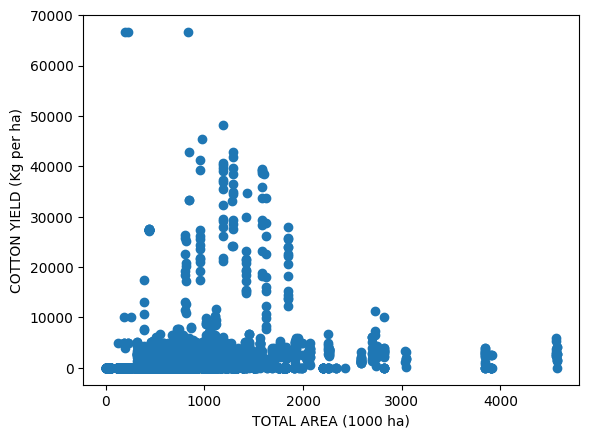

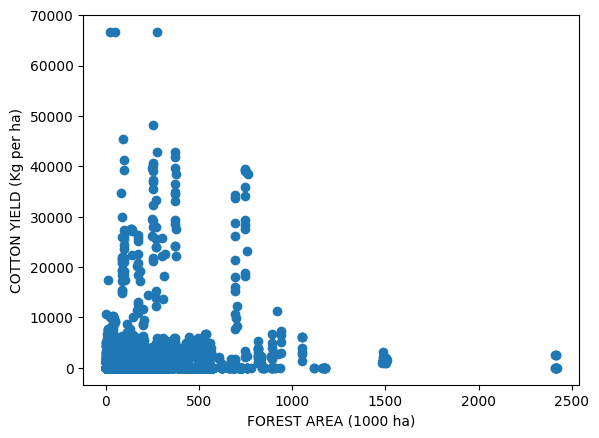

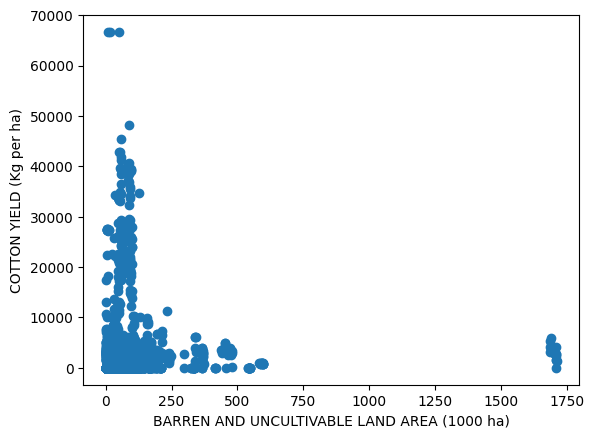

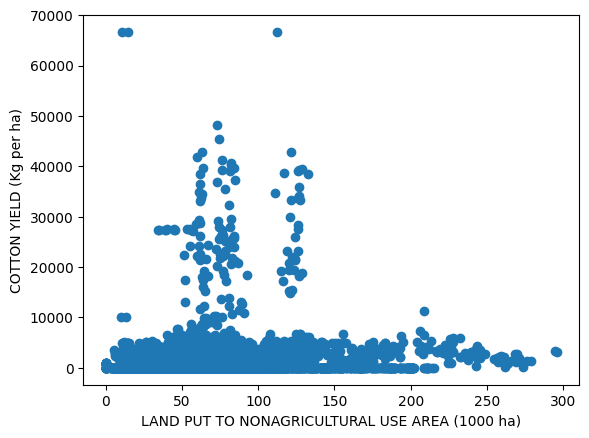

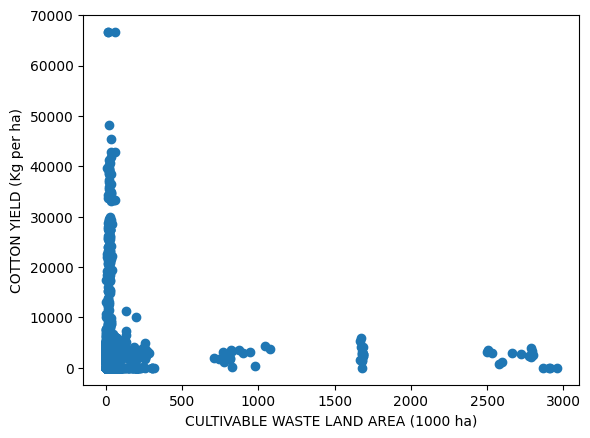

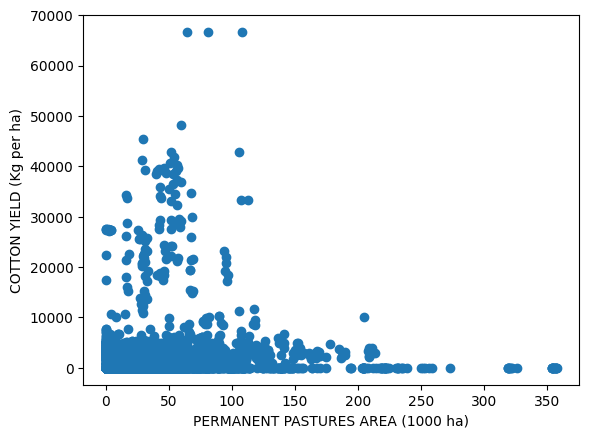

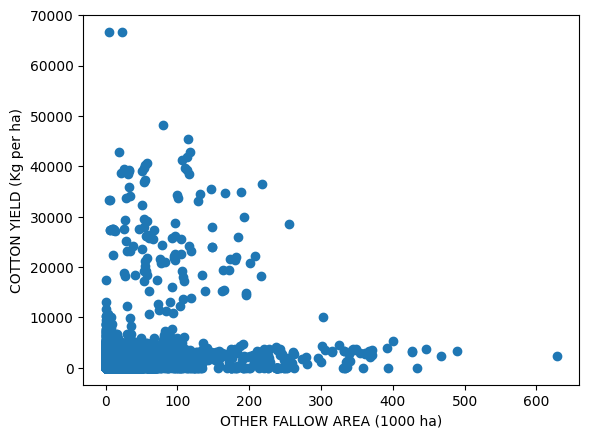

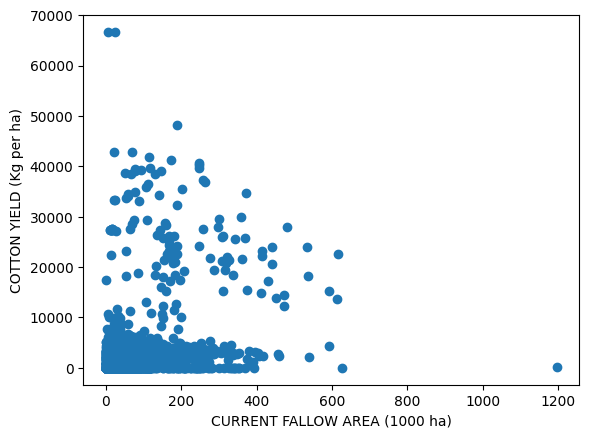

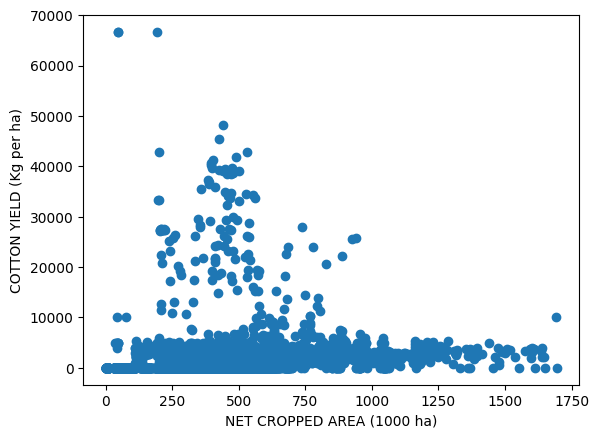

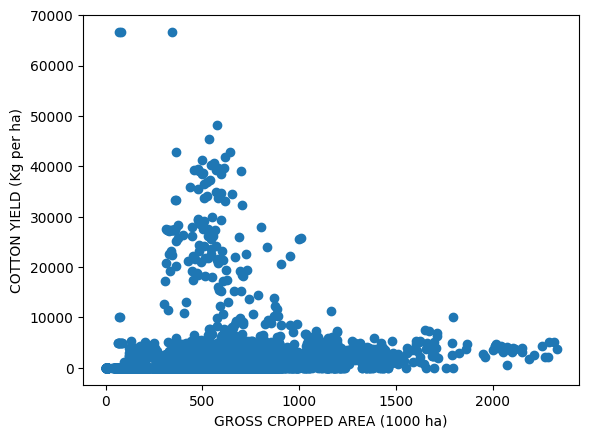

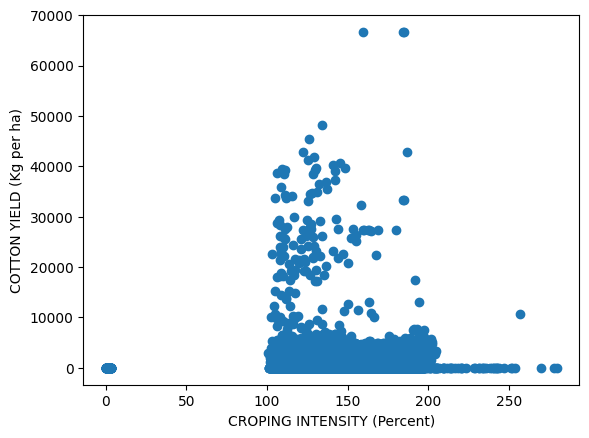

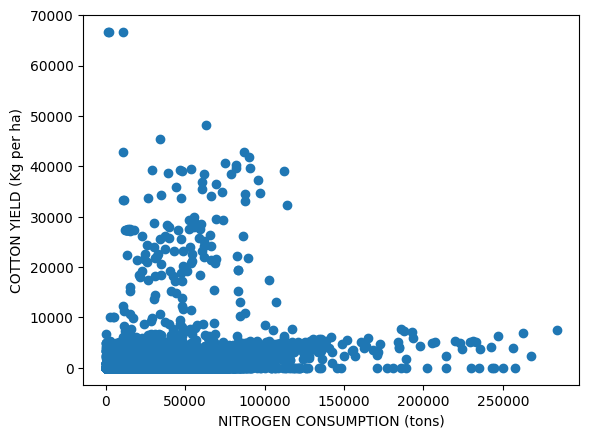

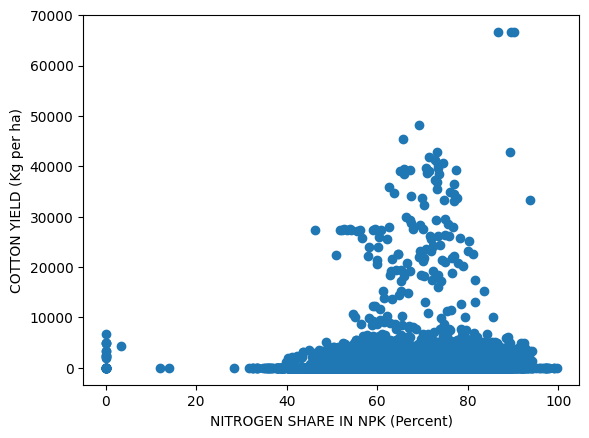

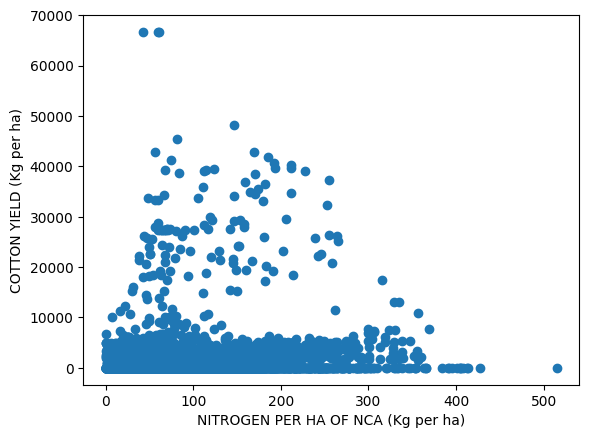

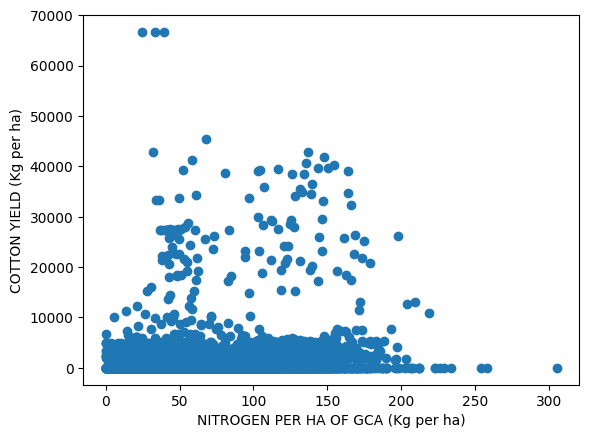

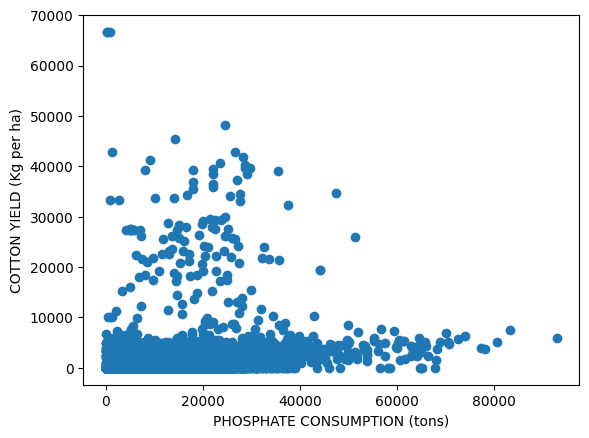

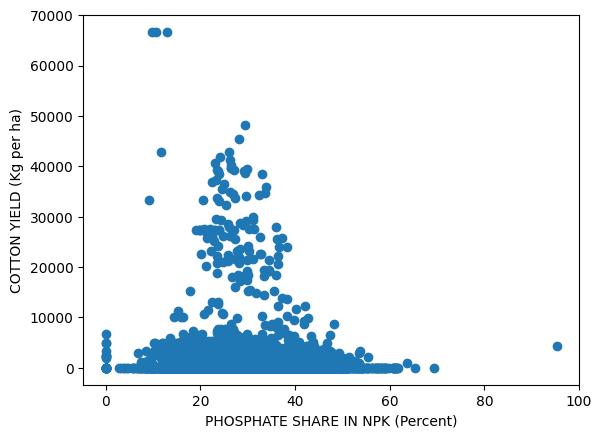

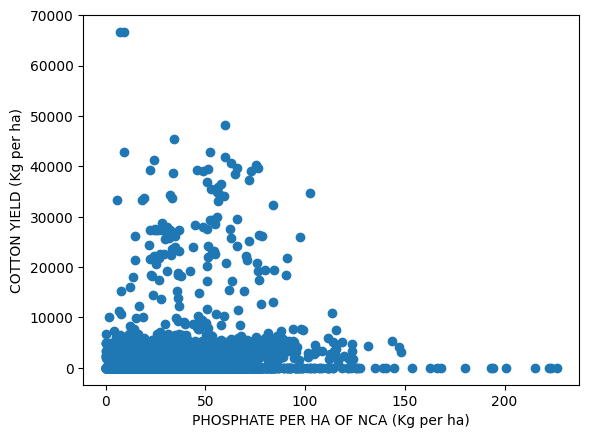

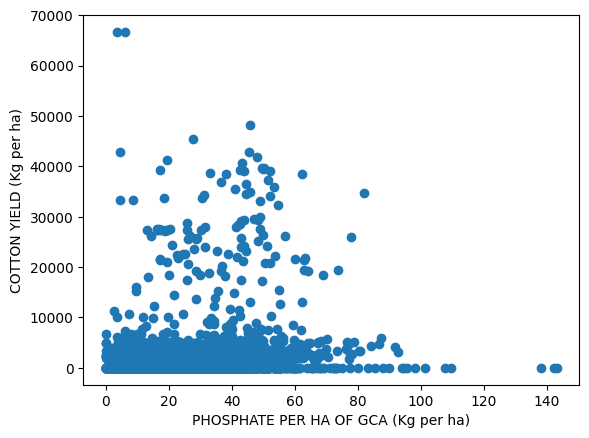

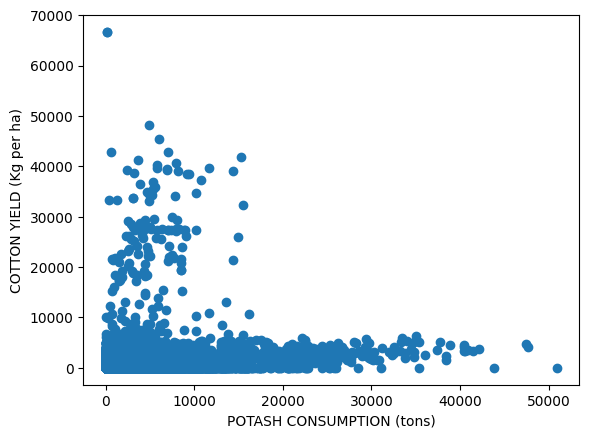

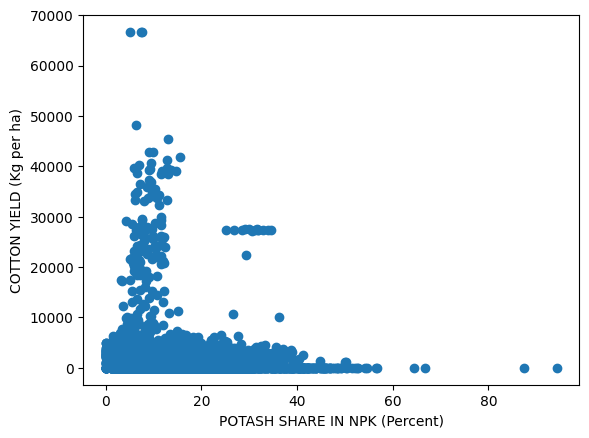

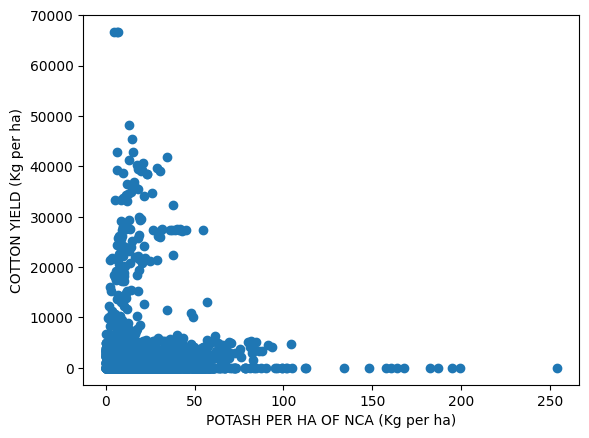

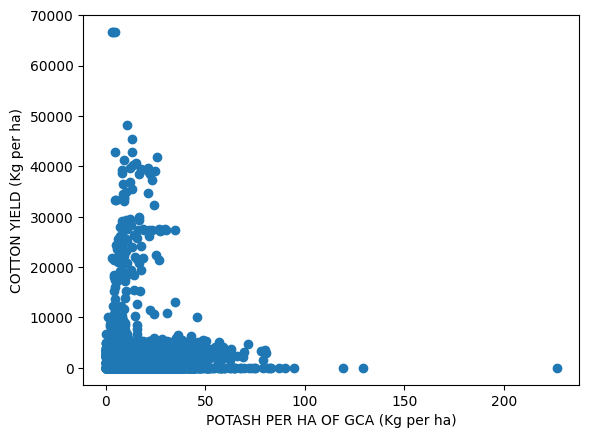

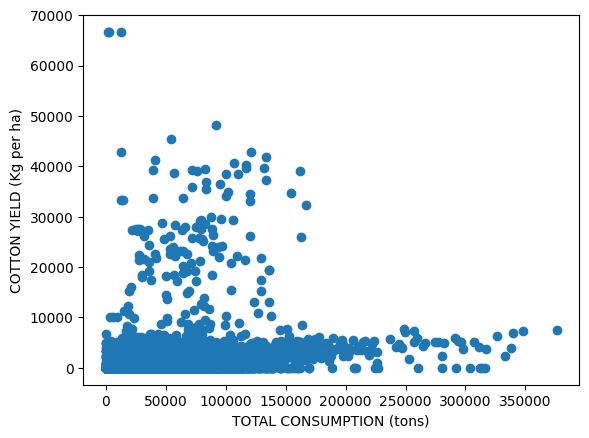

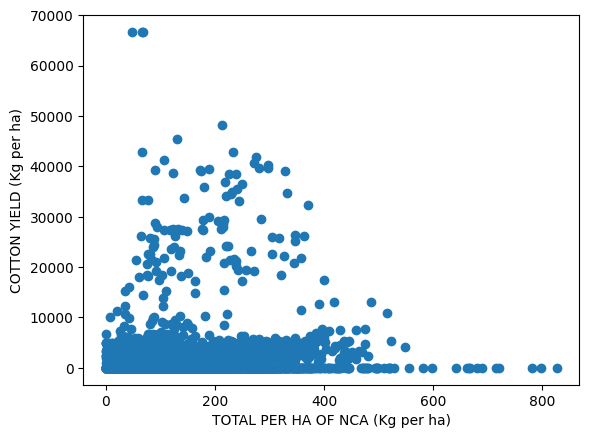

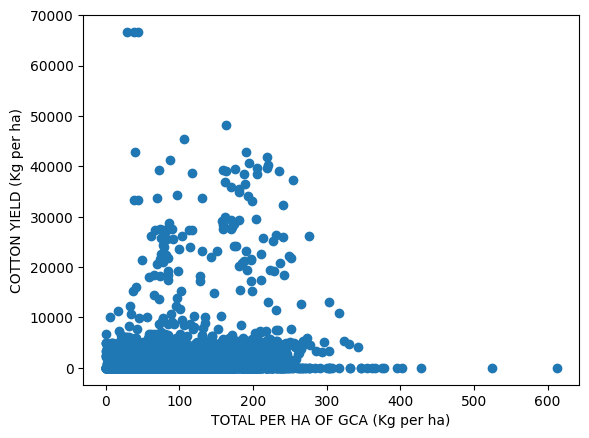

In [ ]:
for feature in r_nn:
        data=india_train.copy()
        plt.scatter(data[feature],data['COTTON YIELD (Kg per ha)'])
        plt.xlabel(feature)
        plt.ylabel('COTTON YIELD (Kg per ha)')
        plt.show()

In [ ]:
def append_list(list1, list2):

  list1.extend(list2)
  return list1

In [ ]:
#tt=append_list(r_nn,ad)
#tt

#now take care of the COTTON YIELD (Kg per ha)

In [ ]:
india_train['cotton_ratio'] = (india_train['COTTON PRODUCTION (1000 tons)']/india_train['COTTON AREA (1000 ha)'])*1000

In [ ]:
india_test['cotton_ratio'] = (india_test['COTTON PRODUCTION (1000 tons)']/india_test['COTTON AREA (1000 ha)'])*1000

* deal rows with neative and very high values
* there are 212 rows with neagtive values in COTTON YIELD (Kg per ha)
* easy way is to drop the 212 rows(for test dataset we can make them as zero)
* so if we have cotton_prod is neg yeild will be zero
* In train dataset there are 228 Nan value in production col

In [ ]:
india_test.head()

In [ ]:
india_train.describe()

In [ ]:
print(india_test.shape)
india_train.shape

(2476, 104)


(4705, 104)

In [ ]:
#india_train[india_train['COTTON AREA (1000 ha)']<0]

In [ ]:
#india_train[(india_train['COTTON YIELD (Kg per ha)']>=0)&(india_train['COTTON PRODUCTION (1000 tons)']<0)]

In [ ]:
india_train[india_train['COTTON PRODUCTION (1000 tons)'].isna()]

,Year,State Name,Dist Name,COTTON AREA (1000 ha),COTTON PRODUCTION (1000 tons),COTTON YIELD (Kg per ha),JANUARY PERCIPITATION (Millimeters),FEBRUARY PERCIPITATION (Millimeters),MARCH PERCIPITATION (Millimeters),APRIL PERCIPITATION (Millimeters),...,PHOSPHATE PER HA OF NCA (Kg per ha),PHOSPHATE PER HA OF GCA (Kg per ha),POTASH CONSUMPTION (tons),POTASH SHARE IN NPK (Percent),POTASH PER HA OF NCA (Kg per ha),POTASH PER HA OF GCA (Kg per ha),TOTAL CONSUMPTION (tons),TOTAL PER HA OF NCA (Kg per ha),TOTAL PER HA OF GCA (Kg per ha),cotton_ratio
17,1990,Bihar,Gaya,3.0,NaN,5001,2.61,28.98,15.22,4.55,...,0.00,NaN,0.0,0.00,0.00,0.00,0.0,0.00,0.00,NaN
21,1990,Chhattisgarh,Raigarh,0.0,NaN,0,4.38,25.89,27.12,8.83,...,NaN,6.85,1312.0,12.24,6.40,3.25,15898.0,32.12,29.26,NaN
40,1990,Haryana,Hissar,2307.0,NaN,4414,4.18,34.63,12.70,4.89,...,41.81,27.31,373.0,2.21,4.31,1.18,177522.0,149.21,91.40,NaN
47,1990,Himachal Pradesh,Chamba,0.0,NaN,0,85.57,190.77,225.04,63.73,...,2.56,5.00,53.0,9.00,2.22,3.78,852.0,23.34,15.08,NaN
92,1990,Madhya Pradesh,Tikamgarh,0.0,NaN,0,3.10,16.70,4.02,NaN,...,29.46,20.31,397.0,3.25,2.61,NaN,17504.0,74.73,54.58,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4588,2006,Orissa,Sundargarh,3.0,NaN,0,0.00,0.00,47.81,15.30,...,10.96,10.17,911.0,13.03,6.03,6.43,9074.0,34.24,26.20,NaN
4595,2006,Punjab,Ferozpur,1512.0,NaN,7294,16.28,6.21,34.21,3.75,...,87.73,48.81,6209.0,3.78,10.04,7.72,348186.0,396.69,209.74,NaN
4608,2006,Rajasthan,Churu,8.0,NaN,3333,3.76,1.76,16.52,1.35,...,3.48,3.40,38.0,5.59,1.03,3.03,2259.0,4.94,5.59,NaN
4632,2006,Tamil Nadu,Kanyakumari,3.0,NaN,0,43.01,12.70,126.39,59.59,...,39.29,31.59,NaN,34.76,49.72,44.23,12308.0,156.38,136.94,NaN



* we have 132 negative value rows eleminate those test
* there are 117 rows in testdata which has Nan value in cotton_prod column
* We need eliminate to eleminate those rows which has  negative in production col not nan

In [ ]:
#df = df[~((df['Age'] < 30) | (df['Gender'] == 'Female'))]

2227

In [ ]:
#india_test[india_test['COTTON PRODUCTION (1000 tons)']<0]

In [ ]:
#india_test[india_test['COTTON PRODUCTION (1000 tons)']<0]

In [ ]:
india_train[(india_train['COTTON PRODUCTION (1000 tons)']<0)&(india_train['COTTON YIELD (Kg per ha)']>=0)]

,Year,State Name,Dist Name,COTTON AREA (1000 ha),COTTON PRODUCTION (1000 tons),COTTON YIELD (Kg per ha),JANUARY PERCIPITATION (Millimeters),FEBRUARY PERCIPITATION (Millimeters),MARCH PERCIPITATION (Millimeters),APRIL PERCIPITATION (Millimeters),...,PHOSPHATE PER HA OF NCA (Kg per ha),PHOSPHATE PER HA OF GCA (Kg per ha),POTASH CONSUMPTION (tons),POTASH SHARE IN NPK (Percent),POTASH PER HA OF NCA (Kg per ha),POTASH PER HA OF GCA (Kg per ha),TOTAL CONSUMPTION (tons),TOTAL PER HA OF NCA (Kg per ha),TOTAL PER HA OF GCA (Kg per ha),cotton_ratio
1136,1994,Gujarat,Dangs,0.0,-8.0,0,7.9,0.0,0.0,9.76,...,2.16,2.16,0.0,0.0,0.0,0.0,47.0,2.81,3.81,-inf


* there are 209 rows of neg value in prod column train
* **Also when we have - in prod target value is always - or 0**
* we - value in target when area of cultivation is - or when we have nan in prodution column(one)

In [ ]:
#test
its_p =   india_test[~(india_test['COTTON PRODUCTION (1000 tons)']<0)]
its_p = its_p.reset_index(drop=True)
print(its_p.shape)
its_p.head()

(2344, 104)


,Year,State Name,Dist Name,COTTON AREA (1000 ha),COTTON PRODUCTION (1000 tons),COTTON YIELD (Kg per ha),JANUARY PERCIPITATION (Millimeters),FEBRUARY PERCIPITATION (Millimeters),MARCH PERCIPITATION (Millimeters),APRIL PERCIPITATION (Millimeters),...,PHOSPHATE PER HA OF NCA (Kg per ha),PHOSPHATE PER HA OF GCA (Kg per ha),POTASH CONSUMPTION (tons),POTASH SHARE IN NPK (Percent),POTASH PER HA OF NCA (Kg per ha),POTASH PER HA OF GCA (Kg per ha),TOTAL CONSUMPTION (tons),TOTAL PER HA OF NCA (Kg per ha),TOTAL PER HA OF GCA (Kg per ha),cotton_ratio
0,2007,Andhra Pradesh,Srikakulam,179.0,124.0,0,0.0,19.53,0.0,18.03,...,28.28,20.03,NaN,17.46,NaN,15.77,64007.0,134.94,97.83,692.737430
1,2007,Andhra Pradesh,Visakhapatnam,39.0,27.0,0,0.0,9.90,0.0,16.02,...,20.29,16.25,6842.0,16.00,15.44,NaN,48839.0,107.11,85.50,692.307692
2,2007,Andhra Pradesh,East Godavari,81.0,316.0,0,0.0,7.00,NaN,12.87,...,91.41,53.02,29651.0,21.68,68.70,39.54,158750.0,366.49,NaN,3901.234568
3,2007,Andhra Pradesh,West Godavari,49.0,309.0,0,0.0,5.13,NaN,8.27,...,149.91,96.38,50048.0,22.00,117.34,74.79,250292.0,568.85,355.04,6306.122449
4,2007,Andhra Pradesh,Krishna,3479.0,1956.0,0,0.0,6.71,0.0,9.97,...,NaN,74.52,32780.0,19.03,69.82,46.43,192459.0,408.09,264.86,562.230526


In [ ]:
#train
itr_p =  india_train[~((india_train['COTTON PRODUCTION (1000 tons)']<0)|(india_train['COTTON YIELD (Kg per ha)']<0))]
itr_p = itr_p.reset_index(drop=True)
print(itr_p.shape)
itr_p.head()

(4492, 104)


,Year,State Name,Dist Name,COTTON AREA (1000 ha),COTTON PRODUCTION (1000 tons),COTTON YIELD (Kg per ha),JANUARY PERCIPITATION (Millimeters),FEBRUARY PERCIPITATION (Millimeters),MARCH PERCIPITATION (Millimeters),APRIL PERCIPITATION (Millimeters),...,PHOSPHATE PER HA OF NCA (Kg per ha),PHOSPHATE PER HA OF GCA (Kg per ha),POTASH CONSUMPTION (tons),POTASH SHARE IN NPK (Percent),POTASH PER HA OF NCA (Kg per ha),POTASH PER HA OF GCA (Kg per ha),TOTAL CONSUMPTION (tons),TOTAL PER HA OF NCA (Kg per ha),TOTAL PER HA OF GCA (Kg per ha),cotton_ratio
0,1990,Andhra Pradesh,Srikakulam,0.0,0.0,0,4.05,50.75,75.34,18.87,...,19.79,15.90,1383.0,NaN,5.79,4.21,41684.0,85.21,67.77,NaN
1,1990,Andhra Pradesh,Visakhapatnam,7.0,3.0,3333,NaN,54.03,94.67,12.21,...,15.43,11.63,1363.0,4.03,5.67,3.11,44809.0,90.08,73.74,428.571429
2,1990,Andhra Pradesh,East Godavari,49.0,238.0,4944,3.28,39.90,68.64,8.12,...,48.41,32.27,7882.0,6.86,19.71,13.31,NaN,303.24,194.95,4857.142857
3,1990,Andhra Pradesh,West Godavari,26.0,120.0,4964,4.14,43.94,48.83,5.39,...,89.59,64.73,18271.0,14.01,42.18,33.22,165898.0,375.97,266.35,4615.384615
4,1990,Andhra Pradesh,Krishna,996.0,289.0,2892,1.18,NaN,32.47,2.26,...,77.62,53.68,NaN,13.34,29.04,21.79,139778.0,NaN,193.57,290.160643


In [ ]:
#itr_p[itr_p['COTTON YIELD (Kg per ha)']<0]

In [ ]:
itr_p.describe()

,Year,COTTON AREA (1000 ha),COTTON PRODUCTION (1000 tons),COTTON YIELD (Kg per ha),JANUARY PERCIPITATION (Millimeters),FEBRUARY PERCIPITATION (Millimeters),MARCH PERCIPITATION (Millimeters),APRIL PERCIPITATION (Millimeters),MAY PERCIPITATION (Millimeters),JUNE PERCIPITATION (Millimeters),...,PHOSPHATE PER HA OF NCA (Kg per ha),PHOSPHATE PER HA OF GCA (Kg per ha),POTASH CONSUMPTION (tons),POTASH SHARE IN NPK (Percent),POTASH PER HA OF NCA (Kg per ha),POTASH PER HA OF GCA (Kg per ha),TOTAL CONSUMPTION (tons),TOTAL PER HA OF NCA (Kg per ha),TOTAL PER HA OF GCA (Kg per ha),cotton_ratio
count,4492.000000,4241.000000,4268.000000,4492.000000,4285.000000,4256.000000,4241.000000,4284.000000,4286.000000,4271.000000,...,4268.000000,4270.000000,4287.000000,4273.000000,4248.000000,4266.000000,4236.000000,4239.000000,4268.000000,2220.000000
mean,1997.880009,662.383400,526.798969,2021.636465,17.180938,15.522756,20.906249,27.673429,52.564837,156.866158,...,31.299114,22.894525,4479.574528,11.807737,13.873103,10.946055,50345.039424,122.879623,86.345839,inf
std,4.890389,2254.332834,1658.479967,5016.492592,24.512552,25.302395,28.649220,48.384335,92.880248,197.397276,...,24.268976,15.338440,6327.102077,10.206843,17.617117,12.836478,46772.666374,103.417714,63.236216,NaN
min,1990.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.230000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1994.000000,0.000000,0.000000,0.000000,3.100000,2.787500,3.610000,4.100000,7.440000,55.895000,...,14.410000,11.772500,442.500000,4.610000,4.040000,3.570000,16323.250000,50.195000,39.410000,188.778203
50%,1998.000000,5.000000,0.000000,0.000000,8.050000,6.635000,9.850000,8.590000,17.025000,100.950000,...,25.750000,20.240000,1888.000000,7.910000,7.400000,6.020000,39295.500000,91.570000,72.375000,394.134956
75%,2002.000000,254.000000,145.000000,2464.000000,22.800000,17.560000,28.220000,28.622500,54.545000,187.090000,...,41.220000,30.917500,5803.500000,16.380000,16.675000,13.480000,68932.250000,170.490000,122.150000,1803.788997
max,2006.000000,39702.000000,22694.000000,66671.000000,235.750000,292.430000,247.210000,636.600000,763.050000,3251.370000,...,226.120000,143.030000,50904.000000,94.270000,253.760000,226.540000,375992.000000,826.060000,612.130000,inf


In [ ]:
p_nan = p_zero[p_zero['COTTON PRODUCTION (1000 tons)'].isna()]
p_nan

,Year,State Name,Dist Name,COTTON AREA (1000 ha),COTTON PRODUCTION (1000 tons),COTTON YIELD (Kg per ha),JANUARY PERCIPITATION (Millimeters),FEBRUARY PERCIPITATION (Millimeters),MARCH PERCIPITATION (Millimeters),APRIL PERCIPITATION (Millimeters),...,PHOSPHATE PER HA OF NCA (Kg per ha),PHOSPHATE PER HA OF GCA (Kg per ha),POTASH CONSUMPTION (tons),POTASH SHARE IN NPK (Percent),POTASH PER HA OF NCA (Kg per ha),POTASH PER HA OF GCA (Kg per ha),TOTAL CONSUMPTION (tons),TOTAL PER HA OF NCA (Kg per ha),TOTAL PER HA OF GCA (Kg per ha),cotton_ratio


In [ ]:
p_zero[p_zero['COTTON YIELD (Kg per ha)']>0]

,Year,State Name,Dist Name,COTTON AREA (1000 ha),COTTON PRODUCTION (1000 tons),COTTON YIELD (Kg per ha),JANUARY PERCIPITATION (Millimeters),FEBRUARY PERCIPITATION (Millimeters),MARCH PERCIPITATION (Millimeters),APRIL PERCIPITATION (Millimeters),...,PHOSPHATE PER HA OF NCA (Kg per ha),PHOSPHATE PER HA OF GCA (Kg per ha),POTASH CONSUMPTION (tons),POTASH SHARE IN NPK (Percent),POTASH PER HA OF NCA (Kg per ha),POTASH PER HA OF GCA (Kg per ha),TOTAL CONSUMPTION (tons),TOTAL PER HA OF NCA (Kg per ha),TOTAL PER HA OF GCA (Kg per ha),cotton_ratio


In [ ]:
itr_p[itr_p['COTTON PRODUCTION (1000 tons)'].isna()]

* so columns which  have zero value in prod dont contain any nan
* and when production value is zero then yeild is also zero

In [ ]:
p_zero = itr_p[itr_p['COTTON PRODUCTION (1000 tons)']==0]
p_zero

,Year,State Name,Dist Name,COTTON AREA (1000 ha),COTTON PRODUCTION (1000 tons),COTTON YIELD (Kg per ha),JANUARY PERCIPITATION (Millimeters),FEBRUARY PERCIPITATION (Millimeters),MARCH PERCIPITATION (Millimeters),APRIL PERCIPITATION (Millimeters),...,PHOSPHATE PER HA OF NCA (Kg per ha),PHOSPHATE PER HA OF GCA (Kg per ha),POTASH CONSUMPTION (tons),POTASH SHARE IN NPK (Percent),POTASH PER HA OF NCA (Kg per ha),POTASH PER HA OF GCA (Kg per ha),TOTAL CONSUMPTION (tons),TOTAL PER HA OF NCA (Kg per ha),TOTAL PER HA OF GCA (Kg per ha),cotton_ratio
0,1990,Andhra Pradesh,Srikakulam,0.0,0.0,0,4.05,50.75,75.34,18.87,...,19.79,15.90,1383.0,NaN,5.79,4.21,41684.0,85.21,67.77,NaN
8,1990,Andhra Pradesh,Chittoor,0.0,0.0,0,9.21,7.73,19.78,11.15,...,24.67,20.22,3221.0,10.04,9.80,9.32,35618.0,78.25,71.97,NaN
9,1990,Bihar,Muzaffarpur,3.0,0.0,0,8.13,23.99,13.38,11.26,...,0.00,0.00,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.0
10,1990,Bihar,Darbhanga,4.0,0.0,0,NaN,11.19,14.74,10.80,...,0.00,0.00,0.0,NaN,0.00,0.00,0.0,0.00,0.00,0.0
11,1990,Bihar,Saharsa,0.0,0.0,0,0.00,13.03,17.38,20.31,...,0.00,0.00,0.0,0.00,0.00,0.00,0.0,0.00,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4487,2006,West Bengal,Jalpaiguri,0.0,0.0,0,0.00,8.68,48.92,284.72,...,44.20,25.52,11421.0,27.03,35.01,24.74,43874.0,133.67,80.70,NaN
4488,2006,West Bengal,Darjeeling,0.0,0.0,0,0.00,9.32,67.40,288.60,...,64.10,48.93,6477.0,NaN,48.47,34.63,42436.0,301.08,224.49,NaN
4489,2006,West Bengal,Malda,NaN,0.0,0,0.00,4.68,16.49,48.28,...,108.35,58.66,20547.0,25.82,99.19,53.77,94166.0,446.42,241.29,NaN
4490,2006,West Bengal,Cooch Behar,0.0,0.0,0,0.00,7.62,31.35,248.95,...,42.16,22.97,8003.0,25.74,33.22,18.43,35189.0,144.73,74.27,NaN


In [ ]:
p_zero[p_zero['COTTON PRODUCTION (1000 tons)'].isna()]

,Year,State Name,Dist Name,COTTON AREA (1000 ha),COTTON PRODUCTION (1000 tons),COTTON YIELD (Kg per ha),JANUARY PERCIPITATION (Millimeters),FEBRUARY PERCIPITATION (Millimeters),MARCH PERCIPITATION (Millimeters),APRIL PERCIPITATION (Millimeters),...,PHOSPHATE PER HA OF NCA (Kg per ha),PHOSPHATE PER HA OF GCA (Kg per ha),POTASH CONSUMPTION (tons),POTASH SHARE IN NPK (Percent),POTASH PER HA OF NCA (Kg per ha),POTASH PER HA OF GCA (Kg per ha),TOTAL CONSUMPTION (tons),TOTAL PER HA OF NCA (Kg per ha),TOTAL PER HA OF GCA (Kg per ha),cotton_ratio


In [ ]:
p_zero[p_zero['COTTON YIELD (Kg per ha)']>0]

,Year,State Name,Dist Name,COTTON AREA (1000 ha),COTTON PRODUCTION (1000 tons),COTTON YIELD (Kg per ha),JANUARY PERCIPITATION (Millimeters),FEBRUARY PERCIPITATION (Millimeters),MARCH PERCIPITATION (Millimeters),APRIL PERCIPITATION (Millimeters),...,PHOSPHATE PER HA OF NCA (Kg per ha),PHOSPHATE PER HA OF GCA (Kg per ha),POTASH CONSUMPTION (tons),POTASH SHARE IN NPK (Percent),POTASH PER HA OF NCA (Kg per ha),POTASH PER HA OF GCA (Kg per ha),TOTAL CONSUMPTION (tons),TOTAL PER HA OF NCA (Kg per ha),TOTAL PER HA OF GCA (Kg per ha),cotton_ratio


#inferencing zero values in yeild column

* so columns which  have zero value in prod dont contain any nan
* and when production value is zero then yeild is also zero

In [ ]:
itr_pz =  itr_p[~(itr_p['COTTON PRODUCTION (1000 tons)']==0)]
itr_pz = itr_pz.reset_index(drop=True)
print(itr_pz.shape)
itr_pz.head()

(2302, 104)


,Year,State Name,Dist Name,COTTON AREA (1000 ha),COTTON PRODUCTION (1000 tons),COTTON YIELD (Kg per ha),JANUARY PERCIPITATION (Millimeters),FEBRUARY PERCIPITATION (Millimeters),MARCH PERCIPITATION (Millimeters),APRIL PERCIPITATION (Millimeters),...,PHOSPHATE PER HA OF NCA (Kg per ha),PHOSPHATE PER HA OF GCA (Kg per ha),POTASH CONSUMPTION (tons),POTASH SHARE IN NPK (Percent),POTASH PER HA OF NCA (Kg per ha),POTASH PER HA OF GCA (Kg per ha),TOTAL CONSUMPTION (tons),TOTAL PER HA OF NCA (Kg per ha),TOTAL PER HA OF GCA (Kg per ha),cotton_ratio
0,1990,Andhra Pradesh,Visakhapatnam,7.0,3.0,3333,NaN,54.03,94.67,12.21,...,15.43,11.63,1363.0,4.03,5.67,3.11,44809.0,90.08,73.74,428.571429
1,1990,Andhra Pradesh,East Godavari,49.0,238.0,4944,3.28,39.90,68.64,8.12,...,48.41,32.27,7882.0,6.86,19.71,13.31,NaN,303.24,194.95,4857.142857
2,1990,Andhra Pradesh,West Godavari,26.0,120.0,4964,4.14,43.94,48.83,5.39,...,89.59,64.73,18271.0,14.01,42.18,33.22,165898.0,375.97,266.35,4615.384615
3,1990,Andhra Pradesh,Krishna,996.0,289.0,2892,1.18,NaN,32.47,2.26,...,77.62,53.68,NaN,13.34,29.04,21.79,139778.0,NaN,193.57,290.160643
4,1990,Andhra Pradesh,Guntur,16104.0,869.0,5371,4.23,20.38,42.80,4.10,...,64.31,49.95,22460.0,13.39,26.37,22.11,216196.0,248.23,188.03,53.961749


In [ ]:
its_pz =  its_p[~(its_p['COTTON PRODUCTION (1000 tons)']==0)]
its_pz = its_pz.reset_index(drop=True)
print(its_pz.shape)
its_pz.head()

(1128, 104)


,Year,State Name,Dist Name,COTTON AREA (1000 ha),COTTON PRODUCTION (1000 tons),COTTON YIELD (Kg per ha),JANUARY PERCIPITATION (Millimeters),FEBRUARY PERCIPITATION (Millimeters),MARCH PERCIPITATION (Millimeters),APRIL PERCIPITATION (Millimeters),...,PHOSPHATE PER HA OF NCA (Kg per ha),PHOSPHATE PER HA OF GCA (Kg per ha),POTASH CONSUMPTION (tons),POTASH SHARE IN NPK (Percent),POTASH PER HA OF NCA (Kg per ha),POTASH PER HA OF GCA (Kg per ha),TOTAL CONSUMPTION (tons),TOTAL PER HA OF NCA (Kg per ha),TOTAL PER HA OF GCA (Kg per ha),cotton_ratio
0,2007,Andhra Pradesh,Srikakulam,179.0,124.0,0,0.0,19.53,0.0,18.03,...,28.28,20.03,NaN,17.46,NaN,15.77,64007.0,134.94,97.83,692.737430
1,2007,Andhra Pradesh,Visakhapatnam,39.0,27.0,0,0.0,9.90,0.0,16.02,...,20.29,16.25,6842.0,16.00,15.44,NaN,48839.0,107.11,85.50,692.307692
2,2007,Andhra Pradesh,East Godavari,81.0,316.0,0,0.0,7.00,NaN,12.87,...,91.41,53.02,29651.0,21.68,68.70,39.54,158750.0,366.49,NaN,3901.234568
3,2007,Andhra Pradesh,West Godavari,49.0,309.0,0,0.0,5.13,NaN,8.27,...,149.91,96.38,50048.0,22.00,117.34,74.79,250292.0,568.85,355.04,6306.122449
4,2007,Andhra Pradesh,Krishna,3479.0,1956.0,0,0.0,6.71,0.0,9.97,...,NaN,74.52,32780.0,19.03,69.82,46.43,192459.0,408.09,264.86,562.230526


#get set the nan values in the production column

In [ ]:
(101/224)*100

45.089285714285715

In [ ]:
p_nan = itr_pz[itr_pz['COTTON PRODUCTION (1000 tons)'].isna()]

*  so we know that if cotton_production=0 then yeild = 0
* remove zero cotton_production rows 2190 rows (47% data is with zero cotton_prod,2190/4705*100)
* there are 224 rows with nan production value train(zn)
* 101 rows have both nan in prod and zero in yeild column

**so agin for yeild to be zero the production value**
  
  1.negative or

  2.prod value nan and

* so we have 224 rows that has nan value in them
* in 224, 101 rows has zero yeild value 45%
* the remaning 123 rows has target greatrer than zero
* so for 123 rows the value of area will be always positive
* very difficult to give values of target column when production column is nan
* slight chance is that when prod column has nan and area column is very low(<5)
target will be zero

In [ ]:
p_nan

In [ ]:
uu = p_nan[p_nan['COTTON YIELD (Kg per ha)']>0]
uu.describe()

In [ ]:
zz = p_nan[p_nan['COTTON YIELD (Kg per ha)']==0]

In [ ]:
zz.describe()

In [ ]:
p_nan[p_nan['COTTON YIELD (Kg per ha)']>0]

In [ ]:
nan_zny = p_nan[p_nan['COTTON YIELD (Kg per ha)']!=0]
nan_zny

In [ ]:
nan_zy = p_nan[p_nan['COTTON YIELD (Kg per ha)']==0]
nan_zy

In [ ]:
nan_zy['COTTON AREA (1000 ha)'].describe()

In [ ]:
nan_zny['COTTON AREA (1000 ha)'].describe()

In [ ]:
nan_zy[nan_zy['COTTON PRODUCTION (1000 tons)']]

In [ ]:
nan_zy[nan_zy['COTTON AREA (1000 ha)'].isna()]

In [ ]:
y_z = itr_pz[itr_pz['COTTON YIELD (Kg per ha)']==0]
y_z

In [ ]:
y_z[y_z['COTTON PRODUCTION (1000 tons)'].notnull()]

In [ ]:
y_z[y_z['COTTON PRODUCTION (1000 tons)'].isna()]

#ratio between taret(y) and prod/area

In [ ]:
print(itr_pz.shape)
itr_pz.head()

(2302, 104)


,Year,State Name,Dist Name,COTTON AREA (1000 ha),COTTON PRODUCTION (1000 tons),COTTON YIELD (Kg per ha),JANUARY PERCIPITATION (Millimeters),FEBRUARY PERCIPITATION (Millimeters),MARCH PERCIPITATION (Millimeters),APRIL PERCIPITATION (Millimeters),...,PHOSPHATE PER HA OF NCA (Kg per ha),PHOSPHATE PER HA OF GCA (Kg per ha),POTASH CONSUMPTION (tons),POTASH SHARE IN NPK (Percent),POTASH PER HA OF NCA (Kg per ha),POTASH PER HA OF GCA (Kg per ha),TOTAL CONSUMPTION (tons),TOTAL PER HA OF NCA (Kg per ha),TOTAL PER HA OF GCA (Kg per ha),cotton_ratio
0,1990,Andhra Pradesh,Visakhapatnam,7.0,3.0,3333,NaN,54.03,94.67,12.21,...,15.43,11.63,1363.0,4.03,5.67,3.11,44809.0,90.08,73.74,428.571429
1,1990,Andhra Pradesh,East Godavari,49.0,238.0,4944,3.28,39.90,68.64,8.12,...,48.41,32.27,7882.0,6.86,19.71,13.31,NaN,303.24,194.95,4857.142857
2,1990,Andhra Pradesh,West Godavari,26.0,120.0,4964,4.14,43.94,48.83,5.39,...,89.59,64.73,18271.0,14.01,42.18,33.22,165898.0,375.97,266.35,4615.384615
3,1990,Andhra Pradesh,Krishna,996.0,289.0,2892,1.18,NaN,32.47,2.26,...,77.62,53.68,NaN,13.34,29.04,21.79,139778.0,NaN,193.57,290.160643
4,1990,Andhra Pradesh,Guntur,16104.0,869.0,5371,4.23,20.38,42.80,4.10,...,64.31,49.95,22460.0,13.39,26.37,22.11,216196.0,248.23,188.03,53.961749


Text(0, 0.5, 'yield')

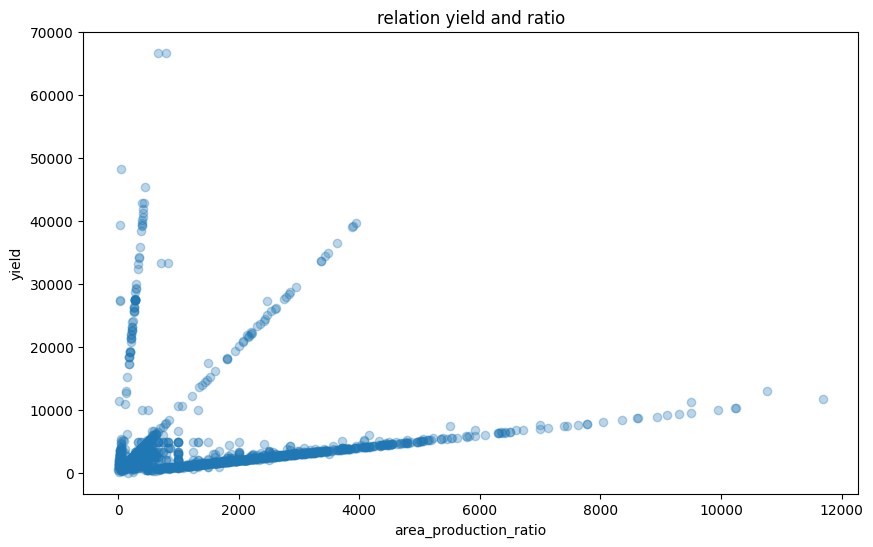

In [ ]:
plt.figure(figsize=(10,6))
plt.scatter(y=itr_pz['COTTON YIELD (Kg per ha)'],x=itr_pz['cotton_ratio'],alpha=0.3)
plt.title("relation yield and ratio")
plt.xlabel("area_production_ratio")
plt.ylabel("yield")

In [ ]:
y_b_10k = itr_pz[itr_pz['COTTON YIELD (Kg per ha)']<10000]
y_b_10k.shape

(2160, 104)

Text(0, 0.5, 'yield')

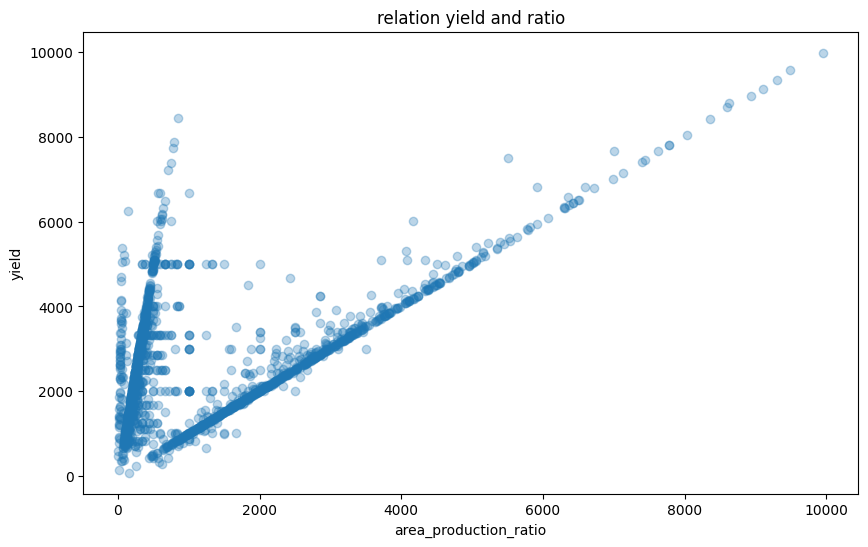

In [ ]:
plt.figure(figsize=(10,6))
plt.scatter(y=y_b_10k['COTTON YIELD (Kg per ha)'],x=y_b_10k['cotton_ratio'],alpha=0.3)
plt.title("relation yield and ratio")
plt.xlabel("area_production_ratio")
plt.ylabel("yield")

In [ ]:
itr_pz[itr_pz['COTTON YIELD (Kg per ha)']>50000]

,Year,State Name,Dist Name,COTTON AREA (1000 ha),COTTON PRODUCTION (1000 tons),COTTON YIELD (Kg per ha),JANUARY PERCIPITATION (Millimeters),FEBRUARY PERCIPITATION (Millimeters),MARCH PERCIPITATION (Millimeters),APRIL PERCIPITATION (Millimeters),...,PHOSPHATE PER HA OF NCA (Kg per ha),PHOSPHATE PER HA OF GCA (Kg per ha),POTASH CONSUMPTION (tons),POTASH SHARE IN NPK (Percent),POTASH PER HA OF NCA (Kg per ha),POTASH PER HA OF GCA (Kg per ha),TOTAL CONSUMPTION (tons),TOTAL PER HA OF NCA (Kg per ha),TOTAL PER HA OF GCA (Kg per ha),cotton_ratio
712,1995,Himachal Pradesh,Kangra,5.0,4.0,66671,NaN,176.26,58.42,39.92,...,9.18,NaN,NaN,5.10,6.75,3.51,12598.0,68.08,38.88,800.000000
855,1996,Himachal Pradesh,Solan,6.0,4.0,66670,72.64,80.03,53.14,16.10,...,7.11,6.22,101.0,7.68,6.42,4.52,2668.0,66.83,44.44,666.666667
856,1996,Himachal Pradesh,Sirmaur,NaN,3.0,66670,73.86,NaN,47.68,18.63,...,NaN,3.56,111.0,7.43,4.57,3.40,2008.0,48.29,28.82,NaN


In [ ]:
#so cut extreme values from yeild column

#45k

y_b_45k = itr_pz[itr_pz['COTTON YIELD (Kg per ha)']<50000]
y_b_45k.shape

(2299, 104)

In [ ]:
y_b_45k = y_b_45k.reset_index(drop=True)
y_b_45k.head()

,Year,State Name,Dist Name,COTTON AREA (1000 ha),COTTON PRODUCTION (1000 tons),COTTON YIELD (Kg per ha),JANUARY PERCIPITATION (Millimeters),FEBRUARY PERCIPITATION (Millimeters),MARCH PERCIPITATION (Millimeters),APRIL PERCIPITATION (Millimeters),...,PHOSPHATE PER HA OF NCA (Kg per ha),PHOSPHATE PER HA OF GCA (Kg per ha),POTASH CONSUMPTION (tons),POTASH SHARE IN NPK (Percent),POTASH PER HA OF NCA (Kg per ha),POTASH PER HA OF GCA (Kg per ha),TOTAL CONSUMPTION (tons),TOTAL PER HA OF NCA (Kg per ha),TOTAL PER HA OF GCA (Kg per ha),cotton_ratio
0,1990,Andhra Pradesh,Visakhapatnam,7.0,3.0,3333,NaN,54.03,94.67,12.21,...,15.43,11.63,1363.0,4.03,5.67,3.11,44809.0,90.08,73.74,428.571429
1,1990,Andhra Pradesh,East Godavari,49.0,238.0,4944,3.28,39.90,68.64,8.12,...,48.41,32.27,7882.0,6.86,19.71,13.31,NaN,303.24,194.95,4857.142857
2,1990,Andhra Pradesh,West Godavari,26.0,120.0,4964,4.14,43.94,48.83,5.39,...,89.59,64.73,18271.0,14.01,42.18,33.22,165898.0,375.97,266.35,4615.384615
3,1990,Andhra Pradesh,Krishna,996.0,289.0,2892,1.18,NaN,32.47,2.26,...,77.62,53.68,NaN,13.34,29.04,21.79,139778.0,NaN,193.57,290.160643
4,1990,Andhra Pradesh,Guntur,16104.0,869.0,5371,4.23,20.38,42.80,4.10,...,64.31,49.95,22460.0,13.39,26.37,22.11,216196.0,248.23,188.03,53.961749


In [ ]:
y_b_45k['cotton_ratio'] = y_b_45k['cotton_ratio'].round(2)

In [ ]:
y_b_45k['slope'] = (y_b_45k['COTTON YIELD (Kg per ha)']/y_b_45k['cotton_ratio']).round(2)
y_b_45k.head()

,Year,State Name,Dist Name,COTTON AREA (1000 ha),COTTON PRODUCTION (1000 tons),COTTON YIELD (Kg per ha),JANUARY PERCIPITATION (Millimeters),FEBRUARY PERCIPITATION (Millimeters),MARCH PERCIPITATION (Millimeters),APRIL PERCIPITATION (Millimeters),...,PHOSPHATE PER HA OF GCA (Kg per ha),POTASH CONSUMPTION (tons),POTASH SHARE IN NPK (Percent),POTASH PER HA OF NCA (Kg per ha),POTASH PER HA OF GCA (Kg per ha),TOTAL CONSUMPTION (tons),TOTAL PER HA OF NCA (Kg per ha),TOTAL PER HA OF GCA (Kg per ha),cotton_ratio,slope
0,1990,Andhra Pradesh,Visakhapatnam,7.0,3.0,3333,NaN,54.03,94.67,12.21,...,11.63,1363.0,4.03,5.67,3.11,44809.0,90.08,73.74,428.57,7.78
1,1990,Andhra Pradesh,East Godavari,49.0,238.0,4944,3.28,39.90,68.64,8.12,...,32.27,7882.0,6.86,19.71,13.31,NaN,303.24,194.95,4857.14,1.02
2,1990,Andhra Pradesh,West Godavari,26.0,120.0,4964,4.14,43.94,48.83,5.39,...,64.73,18271.0,14.01,42.18,33.22,165898.0,375.97,266.35,4615.38,1.08
3,1990,Andhra Pradesh,Krishna,996.0,289.0,2892,1.18,NaN,32.47,2.26,...,53.68,NaN,13.34,29.04,21.79,139778.0,NaN,193.57,290.16,9.97
4,1990,Andhra Pradesh,Guntur,16104.0,869.0,5371,4.23,20.38,42.80,4.10,...,49.95,22460.0,13.39,26.37,22.11,216196.0,248.23,188.03,53.96,99.54


In [ ]:
y_b_45k['slope'].value_counts()

1.00     381
1.01     147
10.00     68
10.01     51
1.02      42
        ... 
35.81      1
8.63       1
8.28       1
9.35       1
10.78      1
Name: slope, Length: 519, dtype: int64

519 



<ipython-input-56-d32179357c34>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_b_45k['slope'],color="y");


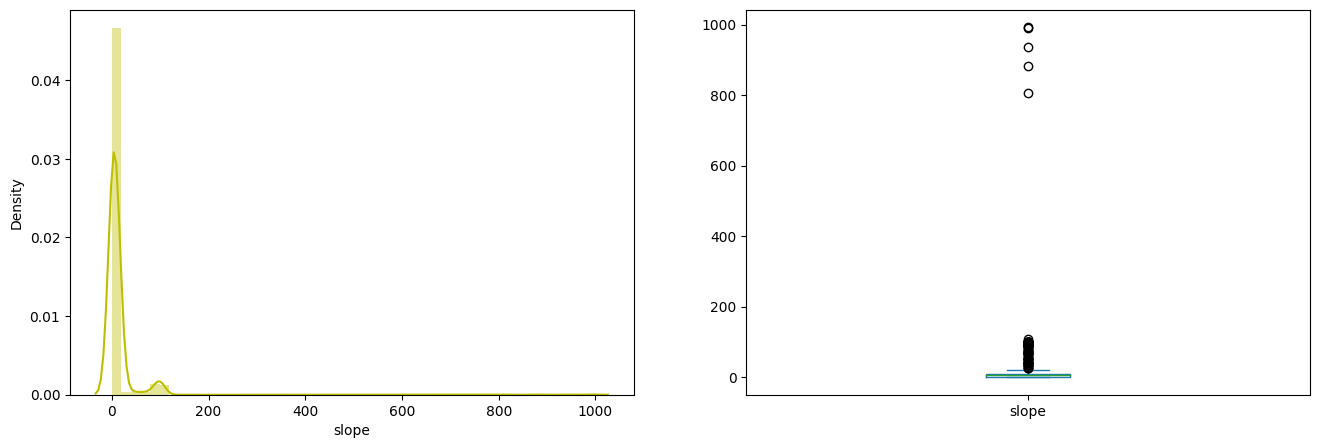

In [ ]:
import seaborn as sns
print(y_b_45k['slope'].nunique(),"\n")
plt.subplot(121)
sns.distplot(y_b_45k['slope'],color="y");

plt.subplot(122)
y_b_45k['slope'].plot.box(figsize=(16,5))

plt.show()

# model

* so we need to be very carefull when the test dataset columns cotton_p and cotton_are has negative values and
* when we have missing values in these two columns
* we need to seperate these two conditions
* and give an every expected values to them according to state,year,district


* so we know that if cotton_production=0 then yeild = 0
* remove zero cotton_production rows (47% data is with zero cotton_prod,2190/4705*100)

  *  test set there are 1216 rows with zero cotton_prod(49% of the dataset)
* but there are 123 rows where cotton_prod is nan and yeild is greter than zero in train set

**test data nan value details excluding neative value**
* there are 117  rows in testset with nan values in cotton_prod
* there are 231 rows with either production or area is zero
*121 rows with area column nan in

In [ ]:
itr_p.shape

(4493, 104)

In [ ]:
4493 - 2190

2303

In [ ]:
itr_p.describe()

In [ ]:
#df = df[~(df['Gender'] == 'Male')]

7 two nan

In [ ]:
itr_p[itr_p['COTTON AREA (1000 ha)']==0]

In [ ]:
its_p[its_p['COTTON AREA (1000 ha)'].isna()]

,Year,State Name,Dist Name,COTTON AREA (1000 ha),COTTON PRODUCTION (1000 tons),COTTON YIELD (Kg per ha),JANUARY PERCIPITATION (Millimeters),FEBRUARY PERCIPITATION (Millimeters),MARCH PERCIPITATION (Millimeters),APRIL PERCIPITATION (Millimeters),...,PHOSPHATE SHARE IN NPK (Percent),PHOSPHATE PER HA OF NCA (Kg per ha),PHOSPHATE PER HA OF GCA (Kg per ha),POTASH CONSUMPTION (tons),POTASH SHARE IN NPK (Percent),POTASH PER HA OF NCA (Kg per ha),POTASH PER HA OF GCA (Kg per ha),TOTAL CONSUMPTION (tons),TOTAL PER HA OF NCA (Kg per ha),TOTAL PER HA OF GCA (Kg per ha)
50,2007,Himachal Pradesh,Kullu,NaN,0.0,0,6.94,154.09,221.86,76.08,...,26.11,27.85,20.41,1162.0,31.12,33.15,20.03,3985.0,110.95,69.35
78,2007,Kerala,Kozhikode,NaN,0.0,0,3.14,NaN,13.49,123.23,...,20.67,19.24,12.00,9373.0,45.59,42.53,29.46,22535.0,98.45,67.02
113,2007,Madhya Pradesh,Hoshangabad,NaN,0.0,0,2.58,7.38,2.93,NaN,...,32.25,64.36,39.86,3346.0,7.46,8.91,6.97,96536.0,201.58,117.78
116,2007,Maharashtra,Nasik,NaN,1296.0,0,3.12,2.07,0.00,12.99,...,32.26,46.80,42.80,21537.0,16.72,25.37,23.58,NaN,159.02,138.31
136,2007,Maharashtra,Chandrapur,NaN,1774.0,0,1.01,4.59,9.82,15.16,...,32.14,33.48,28.63,5485.0,9.67,10.77,8.37,63257.0,103.12,87.04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2093,2015,Maharashtra,Sangli,NaN,11.0,0,1.15,3.03,31.67,33.52,...,31.44,47.16,35.88,20166.0,22.48,38.12,NaN,93862.0,162.82,126.65
2101,2015,Maharashtra,Akola,NaN,3510.0,0,33.43,5.72,46.33,24.83,...,42.01,54.35,36.81,12237.0,14.36,18.17,12.19,99009.0,123.78,84.44
2103,2015,Maharashtra,Yeotmal,NaN,8703.0,0,17.27,6.86,66.85,62.70,...,31.68,46.82,41.74,16639.0,14.63,20.47,20.76,122086.0,143.84,125.99
2155,2015,Tamil Nadu,Ramananthapuram,NaN,45.0,0,9.71,26.51,22.47,120.41,...,24.44,32.09,30.57,4856.0,14.20,14.22,14.99,47577.0,121.83,118.59


In [ ]:
itr_p[(itr_p['COTTON PRODUCTION (1000 tons)'].isna())|(itr_p['COTTON AREA (1000 tons)'].notnull())]

In [ ]:
india_test[(india_test['COTTON PRODUCTION (1000 tons)'].notnull())|(india_test['COTTON PRODUCTION (1000 ha)'].isna())]

In [ ]:
india_test[india_test['COTTON PRODUCTION (1000 tons)'].isna()]

In [ ]:
itr_p[itr_p['COTTON PRODUCTION (1000 tons)'].isna()]

,Year,State Name,Dist Name,COTTON AREA (1000 ha),COTTON PRODUCTION (1000 tons),COTTON YIELD (Kg per ha),JANUARY PERCIPITATION (Millimeters),FEBRUARY PERCIPITATION (Millimeters),MARCH PERCIPITATION (Millimeters),APRIL PERCIPITATION (Millimeters),...,PHOSPHATE PER HA OF NCA (Kg per ha),PHOSPHATE PER HA OF GCA (Kg per ha),POTASH CONSUMPTION (tons),POTASH SHARE IN NPK (Percent),POTASH PER HA OF NCA (Kg per ha),POTASH PER HA OF GCA (Kg per ha),TOTAL CONSUMPTION (tons),TOTAL PER HA OF NCA (Kg per ha),TOTAL PER HA OF GCA (Kg per ha),cotton_ratio
17,1990,Bihar,Gaya,3.0,NaN,5001,2.61,28.98,15.22,4.55,...,0.00,NaN,0.0,0.00,0.00,0.00,0.0,0.00,0.00,NaN
21,1990,Chhattisgarh,Raigarh,0.0,NaN,0,4.38,25.89,27.12,8.83,...,NaN,6.85,1312.0,12.24,6.40,3.25,15898.0,32.12,29.26,NaN
40,1990,Haryana,Hissar,2307.0,NaN,4414,4.18,34.63,12.70,4.89,...,41.81,27.31,373.0,2.21,4.31,1.18,177522.0,149.21,91.40,NaN
47,1990,Himachal Pradesh,Chamba,0.0,NaN,0,85.57,190.77,225.04,63.73,...,2.56,5.00,53.0,9.00,2.22,3.78,852.0,23.34,15.08,NaN
92,1990,Madhya Pradesh,Tikamgarh,0.0,NaN,0,3.10,16.70,4.02,NaN,...,29.46,20.31,397.0,3.25,2.61,NaN,17504.0,74.73,54.58,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4384,2006,Orissa,Sundargarh,3.0,NaN,0,0.00,0.00,47.81,15.30,...,10.96,10.17,911.0,13.03,6.03,6.43,9074.0,34.24,26.20,NaN
4391,2006,Punjab,Ferozpur,1512.0,NaN,7294,16.28,6.21,34.21,3.75,...,87.73,48.81,6209.0,3.78,10.04,7.72,348186.0,396.69,209.74,NaN
4404,2006,Rajasthan,Churu,8.0,NaN,3333,3.76,1.76,16.52,1.35,...,3.48,3.40,38.0,5.59,1.03,3.03,2259.0,4.94,5.59,NaN
4428,2006,Tamil Nadu,Kanyakumari,3.0,NaN,0,43.01,12.70,126.39,59.59,...,39.29,31.59,NaN,34.76,49.72,44.23,12308.0,156.38,136.94,NaN


In [ ]:
itr_p[(itr_p['COTTON PRODUCTION (1000 tons)'].notnull())&(itr_p['COTTON PRODUCTION (1000 tons)']==0)]

,Year,State Name,Dist Name,COTTON AREA (1000 ha),COTTON PRODUCTION (1000 tons),COTTON YIELD (Kg per ha),JANUARY PERCIPITATION (Millimeters),FEBRUARY PERCIPITATION (Millimeters),MARCH PERCIPITATION (Millimeters),APRIL PERCIPITATION (Millimeters),...,PHOSPHATE PER HA OF NCA (Kg per ha),PHOSPHATE PER HA OF GCA (Kg per ha),POTASH CONSUMPTION (tons),POTASH SHARE IN NPK (Percent),POTASH PER HA OF NCA (Kg per ha),POTASH PER HA OF GCA (Kg per ha),TOTAL CONSUMPTION (tons),TOTAL PER HA OF NCA (Kg per ha),TOTAL PER HA OF GCA (Kg per ha),cotton_ratio
0,1990,Andhra Pradesh,Srikakulam,0.0,0.0,0,4.05,50.75,75.34,18.87,...,19.79,15.90,1383.0,NaN,5.79,4.21,41684.0,85.21,67.77,NaN
8,1990,Andhra Pradesh,Chittoor,0.0,0.0,0,9.21,7.73,19.78,11.15,...,24.67,20.22,3221.0,10.04,9.80,9.32,35618.0,78.25,71.97,NaN
9,1990,Bihar,Muzaffarpur,3.0,0.0,0,8.13,23.99,13.38,11.26,...,0.00,0.00,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.0
10,1990,Bihar,Darbhanga,4.0,0.0,0,NaN,11.19,14.74,10.80,...,0.00,0.00,0.0,NaN,0.00,0.00,0.0,0.00,0.00,0.0
11,1990,Bihar,Saharsa,0.0,0.0,0,0.00,13.03,17.38,20.31,...,0.00,0.00,0.0,0.00,0.00,0.00,0.0,0.00,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4488,2006,West Bengal,Jalpaiguri,0.0,0.0,0,0.00,8.68,48.92,284.72,...,44.20,25.52,11421.0,27.03,35.01,24.74,43874.0,133.67,80.70,NaN
4489,2006,West Bengal,Darjeeling,0.0,0.0,0,0.00,9.32,67.40,288.60,...,64.10,48.93,6477.0,NaN,48.47,34.63,42436.0,301.08,224.49,NaN
4490,2006,West Bengal,Malda,NaN,0.0,0,0.00,4.68,16.49,48.28,...,108.35,58.66,20547.0,25.82,99.19,53.77,94166.0,446.42,241.29,NaN
4491,2006,West Bengal,Cooch Behar,0.0,0.0,0,0.00,7.62,31.35,248.95,...,42.16,22.97,8003.0,25.74,33.22,18.43,35189.0,144.73,74.27,NaN


In [ ]:
itr_p[(itr_p['COTTON PRODUCTION (1000 tons)'].isna())&(itr_p['COTTON YIELD (Kg per ha)']>0)]

,Year,State Name,Dist Name,COTTON AREA (1000 ha),COTTON PRODUCTION (1000 tons),COTTON YIELD (Kg per ha),JANUARY PERCIPITATION (Millimeters),FEBRUARY PERCIPITATION (Millimeters),MARCH PERCIPITATION (Millimeters),APRIL PERCIPITATION (Millimeters),...,PHOSPHATE PER HA OF NCA (Kg per ha),PHOSPHATE PER HA OF GCA (Kg per ha),POTASH CONSUMPTION (tons),POTASH SHARE IN NPK (Percent),POTASH PER HA OF NCA (Kg per ha),POTASH PER HA OF GCA (Kg per ha),TOTAL CONSUMPTION (tons),TOTAL PER HA OF NCA (Kg per ha),TOTAL PER HA OF GCA (Kg per ha),cotton_ratio
17,1990,Bihar,Gaya,3.0,NaN,5001,2.61,28.98,15.22,4.55,...,0.00,NaN,0.0,0.00,0.00,0.00,0.0,0.00,0.00,NaN
40,1990,Haryana,Hissar,2307.0,NaN,4414,4.18,34.63,12.70,4.89,...,41.81,27.31,373.0,2.21,4.31,1.18,177522.0,149.21,91.40,NaN
129,1990,Maharashtra,Kolhapur,2.0,NaN,2004,0.00,NaN,2.11,21.57,...,58.92,54.52,22898.0,25.21,56.77,52.54,103116.0,243.17,224.10,NaN
134,1990,Maharashtra,Buldhana,2669.0,NaN,1082,2.22,5.16,5.34,0.00,...,NaN,18.47,3729.0,10.30,7.26,8.35,NaN,64.30,56.39,NaN
146,1990,Orissa,Ganjam,70.0,NaN,2093,2.13,77.67,98.19,47.58,...,NaN,7.85,NaN,9.46,8.12,3.10,30623.0,64.79,35.56,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4343,2006,Madhya Pradesh,Sehore,29.0,NaN,1114,0.00,0.00,53.18,3.54,...,NaN,22.22,1986.0,6.94,5.68,4.38,50356.0,95.50,62.49,NaN
4377,2006,Orissa,Ganjam,90.0,NaN,2073,0.00,0.00,36.60,64.74,...,16.21,11.16,4576.0,15.24,11.09,7.47,37372.0,84.50,48.74,NaN
4391,2006,Punjab,Ferozpur,1512.0,NaN,7294,16.28,6.21,34.21,3.75,...,87.73,48.81,6209.0,3.78,10.04,7.72,348186.0,396.69,209.74,NaN
4404,2006,Rajasthan,Churu,8.0,NaN,3333,3.76,1.76,16.52,1.35,...,3.48,3.40,38.0,5.59,1.03,3.03,2259.0,4.94,5.59,NaN


In [ ]:
itr_p[itr_p['COTTON PRODUCTION (1000 tons)']>0]

,Year,State Name,Dist Name,COTTON AREA (1000 ha),COTTON PRODUCTION (1000 tons),COTTON YIELD (Kg per ha),JANUARY PERCIPITATION (Millimeters),FEBRUARY PERCIPITATION (Millimeters),MARCH PERCIPITATION (Millimeters),APRIL PERCIPITATION (Millimeters),...,PHOSPHATE PER HA OF NCA (Kg per ha),PHOSPHATE PER HA OF GCA (Kg per ha),POTASH CONSUMPTION (tons),POTASH SHARE IN NPK (Percent),POTASH PER HA OF NCA (Kg per ha),POTASH PER HA OF GCA (Kg per ha),TOTAL CONSUMPTION (tons),TOTAL PER HA OF NCA (Kg per ha),TOTAL PER HA OF GCA (Kg per ha),cotton_ratio
1,1990,Andhra Pradesh,Visakhapatnam,7.0,3.0,3333,NaN,54.03,94.67,12.21,...,15.43,11.63,1363.0,4.03,5.67,3.11,44809.0,90.08,73.74,428.571429
2,1990,Andhra Pradesh,East Godavari,49.0,238.0,4944,3.28,39.90,68.64,8.12,...,48.41,32.27,7882.0,6.86,19.71,13.31,NaN,303.24,194.95,4857.142857
3,1990,Andhra Pradesh,West Godavari,26.0,120.0,4964,4.14,43.94,48.83,5.39,...,89.59,64.73,18271.0,14.01,42.18,33.22,165898.0,375.97,266.35,4615.384615
4,1990,Andhra Pradesh,Krishna,996.0,289.0,2892,1.18,NaN,32.47,2.26,...,77.62,53.68,NaN,13.34,29.04,21.79,139778.0,NaN,193.57,290.160643
5,1990,Andhra Pradesh,Guntur,16104.0,869.0,5371,4.23,20.38,42.80,4.10,...,64.31,49.95,22460.0,13.39,26.37,22.11,216196.0,248.23,188.03,53.961749
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4441,2006,Uttar Pradesh,Buland Shahar,NaN,10.0,2004,1.43,3.03,28.52,2.64,...,62.97,37.16,3784.0,5.46,13.89,7.46,109456.0,316.07,188.83,NaN
4442,2006,Uttar Pradesh,Aligarh,NaN,24.0,2313,4.24,0.00,30.05,2.06,...,77.77,48.03,2139.0,4.15,7.76,NaN,99551.0,223.67,133.29,NaN
4443,2006,Uttar Pradesh,Mathura,126.0,29.0,2261,1.12,0.00,27.32,2.98,...,61.55,43.64,880.0,5.90,4.25,5.24,46174.0,172.33,119.01,230.158730
4444,2006,Uttar Pradesh,Agra,29.0,8.0,2312,1.15,0.00,46.74,7.39,...,62.63,45.86,2627.0,7.51,8.60,9.16,74735.0,219.44,151.03,275.862069


In [ ]:
itr_p[(itr_p['COTTON PRODUCTION (1000 tons)'].notnull())&(itr_p['COTTON PRODUCTION (1000 tons)']>0)]

,Year,State Name,Dist Name,COTTON AREA (1000 ha),COTTON PRODUCTION (1000 tons),COTTON YIELD (Kg per ha),JANUARY PERCIPITATION (Millimeters),FEBRUARY PERCIPITATION (Millimeters),MARCH PERCIPITATION (Millimeters),APRIL PERCIPITATION (Millimeters),...,PHOSPHATE PER HA OF NCA (Kg per ha),PHOSPHATE PER HA OF GCA (Kg per ha),POTASH CONSUMPTION (tons),POTASH SHARE IN NPK (Percent),POTASH PER HA OF NCA (Kg per ha),POTASH PER HA OF GCA (Kg per ha),TOTAL CONSUMPTION (tons),TOTAL PER HA OF NCA (Kg per ha),TOTAL PER HA OF GCA (Kg per ha),cotton_ratio
1,1990,Andhra Pradesh,Visakhapatnam,7.0,3.0,3333,NaN,54.03,94.67,12.21,...,15.43,11.63,1363.0,4.03,5.67,3.11,44809.0,90.08,73.74,428.571429
2,1990,Andhra Pradesh,East Godavari,49.0,238.0,4944,3.28,39.90,68.64,8.12,...,48.41,32.27,7882.0,6.86,19.71,13.31,NaN,303.24,194.95,4857.142857
3,1990,Andhra Pradesh,West Godavari,26.0,120.0,4964,4.14,43.94,48.83,5.39,...,89.59,64.73,18271.0,14.01,42.18,33.22,165898.0,375.97,266.35,4615.384615
4,1990,Andhra Pradesh,Krishna,996.0,289.0,2892,1.18,NaN,32.47,2.26,...,77.62,53.68,NaN,13.34,29.04,21.79,139778.0,NaN,193.57,290.160643
5,1990,Andhra Pradesh,Guntur,16104.0,869.0,5371,4.23,20.38,42.80,4.10,...,64.31,49.95,22460.0,13.39,26.37,22.11,216196.0,248.23,188.03,53.961749
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4441,2006,Uttar Pradesh,Buland Shahar,NaN,10.0,2004,1.43,3.03,28.52,2.64,...,62.97,37.16,3784.0,5.46,13.89,7.46,109456.0,316.07,188.83,NaN
4442,2006,Uttar Pradesh,Aligarh,NaN,24.0,2313,4.24,0.00,30.05,2.06,...,77.77,48.03,2139.0,4.15,7.76,NaN,99551.0,223.67,133.29,NaN
4443,2006,Uttar Pradesh,Mathura,126.0,29.0,2261,1.12,0.00,27.32,2.98,...,61.55,43.64,880.0,5.90,4.25,5.24,46174.0,172.33,119.01,230.158730
4444,2006,Uttar Pradesh,Agra,29.0,8.0,2312,1.15,0.00,46.74,7.39,...,62.63,45.86,2627.0,7.51,8.60,9.16,74735.0,219.44,151.03,275.862069


In [ ]:
itr_p[itr_p['COTTON PRODUCTION (1000 tons)'].notnull()]

In [ ]:
itr_pz =  itr_p[(itr_p['COTTON PRODUCTION (1000 tons)'].isna())|(itr_p['COTTON PRODUCTION (1000 tons)']>0)]
itr_pz = itr_pz.reset_index(drop=True)
print(itr_pz.shape)
itr_pz.head()

(2302, 104)


,Year,State Name,Dist Name,COTTON AREA (1000 ha),COTTON PRODUCTION (1000 tons),COTTON YIELD (Kg per ha),JANUARY PERCIPITATION (Millimeters),FEBRUARY PERCIPITATION (Millimeters),MARCH PERCIPITATION (Millimeters),APRIL PERCIPITATION (Millimeters),...,PHOSPHATE PER HA OF NCA (Kg per ha),PHOSPHATE PER HA OF GCA (Kg per ha),POTASH CONSUMPTION (tons),POTASH SHARE IN NPK (Percent),POTASH PER HA OF NCA (Kg per ha),POTASH PER HA OF GCA (Kg per ha),TOTAL CONSUMPTION (tons),TOTAL PER HA OF NCA (Kg per ha),TOTAL PER HA OF GCA (Kg per ha),cotton_ratio
0,1990,Andhra Pradesh,Visakhapatnam,7.0,3.0,3333,NaN,54.03,94.67,12.21,...,15.43,11.63,1363.0,4.03,5.67,3.11,44809.0,90.08,73.74,428.571429
1,1990,Andhra Pradesh,East Godavari,49.0,238.0,4944,3.28,39.90,68.64,8.12,...,48.41,32.27,7882.0,6.86,19.71,13.31,NaN,303.24,194.95,4857.142857
2,1990,Andhra Pradesh,West Godavari,26.0,120.0,4964,4.14,43.94,48.83,5.39,...,89.59,64.73,18271.0,14.01,42.18,33.22,165898.0,375.97,266.35,4615.384615
3,1990,Andhra Pradesh,Krishna,996.0,289.0,2892,1.18,NaN,32.47,2.26,...,77.62,53.68,NaN,13.34,29.04,21.79,139778.0,NaN,193.57,290.160643
4,1990,Andhra Pradesh,Guntur,16104.0,869.0,5371,4.23,20.38,42.80,4.10,...,64.31,49.95,22460.0,13.39,26.37,22.11,216196.0,248.23,188.03,53.961749


In [ ]:
its_pz =  its_p[its_p['COTTON PRODUCTION (1000 tons)']>0]
its_pz = its_pz.reset_index(drop=True)
print(its_pz.shape)
its_pz.head()

(1216, 103)


,Year,State Name,Dist Name,COTTON AREA (1000 ha),COTTON PRODUCTION (1000 tons),COTTON YIELD (Kg per ha),JANUARY PERCIPITATION (Millimeters),FEBRUARY PERCIPITATION (Millimeters),MARCH PERCIPITATION (Millimeters),APRIL PERCIPITATION (Millimeters),...,PHOSPHATE SHARE IN NPK (Percent),PHOSPHATE PER HA OF NCA (Kg per ha),PHOSPHATE PER HA OF GCA (Kg per ha),POTASH CONSUMPTION (tons),POTASH SHARE IN NPK (Percent),POTASH PER HA OF NCA (Kg per ha),POTASH PER HA OF GCA (Kg per ha),TOTAL CONSUMPTION (tons),TOTAL PER HA OF NCA (Kg per ha),TOTAL PER HA OF GCA (Kg per ha)
0,2007,Andhra Pradesh,Chittoor,0.0,0.0,0,2.13,14.81,4.09,NaN,...,21.45,30.27,26.48,7328.0,17.08,21.06,NaN,52011.0,146.42,129.31
1,2007,Assam,Darrang,0.0,0.0,0,6.59,38.10,27.10,309.08,...,29.65,16.65,10.87,5351.0,33.80,15.69,12.30,17954.0,50.31,36.58
2,2007,Assam,Dibrugarh,0.0,0.0,0,10.38,116.24,39.76,325.91,...,25.44,14.96,12.64,3719.0,29.57,19.80,16.97,13008.0,58.30,47.39
3,2007,Assam,Goalpara,4.0,0.0,0,8.19,33.77,24.24,322.23,...,29.36,27.99,17.34,9237.0,26.43,26.11,18.53,39406.0,102.60,66.01
4,2007,Assam,Kamrup,3.0,0.0,0,8.02,53.01,27.81,415.29,...,28.78,32.13,26.03,15692.0,28.55,34.86,27.82,61408.0,NaN,96.22


In [ ]:
itr_pz[itr_pz['COTTON YIELD (Kg per ha)']==0]

,Year,State Name,Dist Name,COTTON AREA (1000 ha),COTTON PRODUCTION (1000 tons),COTTON YIELD (Kg per ha),JANUARY PERCIPITATION (Millimeters),FEBRUARY PERCIPITATION (Millimeters),MARCH PERCIPITATION (Millimeters),APRIL PERCIPITATION (Millimeters),...,PHOSPHATE PER HA OF NCA (Kg per ha),PHOSPHATE PER HA OF GCA (Kg per ha),POTASH CONSUMPTION (tons),POTASH SHARE IN NPK (Percent),POTASH PER HA OF NCA (Kg per ha),POTASH PER HA OF GCA (Kg per ha),TOTAL CONSUMPTION (tons),TOTAL PER HA OF NCA (Kg per ha),TOTAL PER HA OF GCA (Kg per ha),cotton_ratio
9,1990,Chhattisgarh,Raigarh,0.0,NaN,0,4.38,25.89,27.12,8.83,...,NaN,6.85,1312.0,12.24,6.40,3.25,15898.0,32.12,29.26,NaN
29,1990,Himachal Pradesh,Chamba,0.0,NaN,0,85.57,190.77,225.04,63.73,...,2.56,5.00,53.0,9.00,2.22,3.78,852.0,23.34,15.08,NaN
48,1990,Madhya Pradesh,Tikamgarh,0.0,NaN,0,3.10,16.70,4.02,NaN,...,29.46,20.31,397.0,3.25,2.61,NaN,17504.0,74.73,54.58,NaN
49,1990,Madhya Pradesh,Guna,0.0,NaN,0,4.26,11.44,3.20,3.08,...,6.68,8.27,53.0,2.68,2.08,4.07,7524.0,NaN,13.02,NaN
62,1990,Maharashtra,Thane,0.0,NaN,0,0.00,2.96,0.00,1.08,...,7.20,NaN,2198.0,20.62,10.22,NaN,12455.0,39.30,36.38,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2181,2006,Assam,Lakhimpur,2.0,NaN,0,2.60,103.41,84.14,369.25,...,4.99,4.65,320.0,17.35,5.95,2.08,NaN,15.64,11.07,NaN
2202,2006,Jharkhand,Ranchi,0.0,NaN,0,0.00,0.00,65.04,14.62,...,31.59,26.50,1569.0,6.80,7.38,4.91,41233.0,89.85,79.58,NaN
2217,2006,Madhya Pradesh,Mandla,0.0,NaN,0,0.00,0.00,122.04,34.54,...,5.67,5.02,81.0,5.32,3.19,3.14,NaN,16.29,14.78,NaN
2252,2006,Orissa,Sundargarh,3.0,NaN,0,0.00,0.00,47.81,15.30,...,10.96,10.17,911.0,13.03,6.03,6.43,9074.0,34.24,26.20,NaN


In [ ]:
itr_pzb10k = itr_pz[itr_pz['COTTON YIELD (Kg per ha)']<10000]

Text(0, 0.5, 'yield')

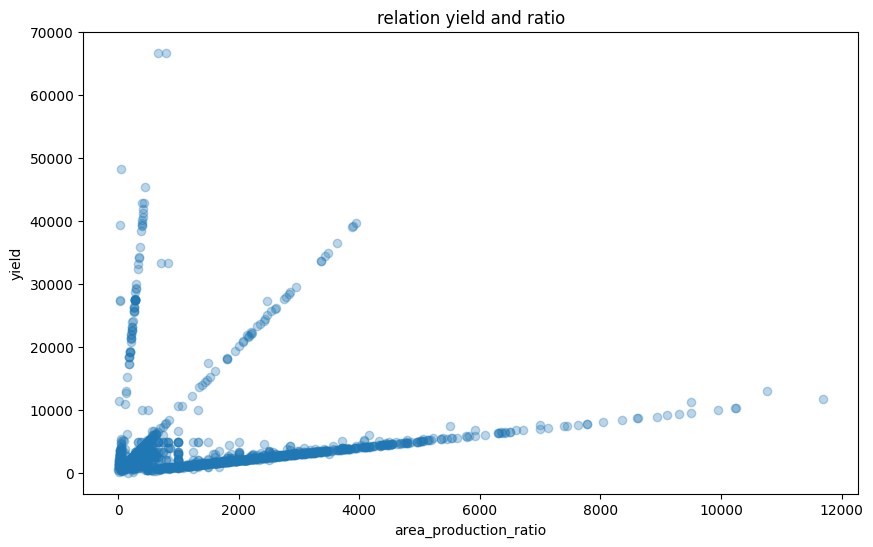

In [ ]:
plt.figure(figsize=(10,6))
plt.scatter(y=itr_pz['COTTON YIELD (Kg per ha)'],x=itr_pz['cotton_ratio'],alpha=0.3)
plt.title("relation yield and ratio")
plt.xlabel("area_production_ratio")
plt.ylabel("yield")

Text(0, 0.5, 'yield')

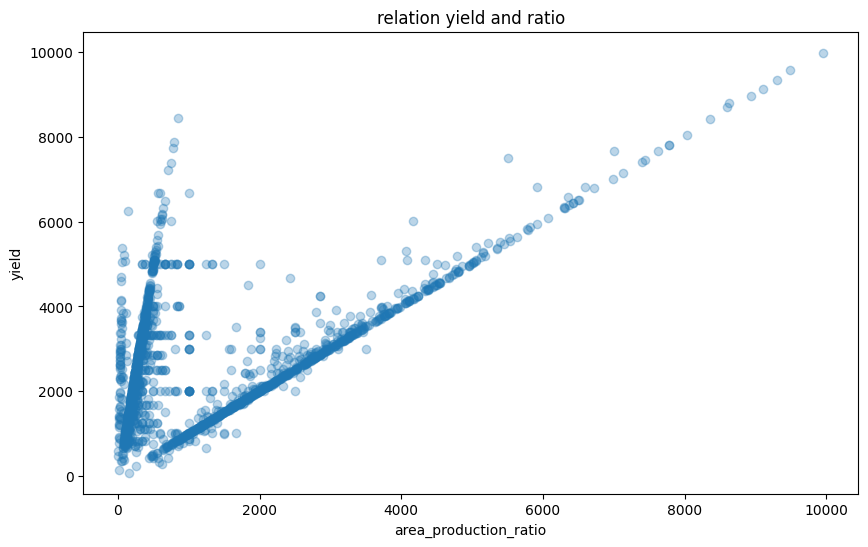

In [ ]:
plt.figure(figsize=(10,6))
plt.scatter(y=itr_pzb10k['COTTON YIELD (Kg per ha)'],x=itr_pzb10k['cotton_ratio'],alpha=0.3)
plt.title("relation yield and ratio")
plt.xlabel("area_production_ratio")
plt.ylabel("yield")

* get the extreme values for yeild out of training dataset

In [ ]:
#above 45k


In [ ]:
#get relation betweeen yeild and area_p_ratio



In [ ]:
itr_p[itr_p['COTTON YIELD (Kg per ha)']==0]

,Year,State Name,Dist Name,COTTON AREA (1000 ha),COTTON PRODUCTION (1000 tons),COTTON YIELD (Kg per ha),JANUARY PERCIPITATION (Millimeters),FEBRUARY PERCIPITATION (Millimeters),MARCH PERCIPITATION (Millimeters),APRIL PERCIPITATION (Millimeters),...,PHOSPHATE PER HA OF NCA (Kg per ha),PHOSPHATE PER HA OF GCA (Kg per ha),POTASH CONSUMPTION (tons),POTASH SHARE IN NPK (Percent),POTASH PER HA OF NCA (Kg per ha),POTASH PER HA OF GCA (Kg per ha),TOTAL CONSUMPTION (tons),TOTAL PER HA OF NCA (Kg per ha),TOTAL PER HA OF GCA (Kg per ha),cotton_ratio
0,1990,Andhra Pradesh,Srikakulam,0.0,0.0,0,4.05,50.75,75.34,18.87,...,19.79,15.90,1383.0,NaN,5.79,4.21,41684.0,85.21,67.77,NaN
8,1990,Andhra Pradesh,Chittoor,0.0,0.0,0,9.21,7.73,19.78,11.15,...,24.67,20.22,3221.0,10.04,9.80,9.32,35618.0,78.25,71.97,NaN
9,1990,Bihar,Muzaffarpur,3.0,0.0,0,8.13,23.99,13.38,11.26,...,0.00,0.00,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.0
10,1990,Bihar,Darbhanga,4.0,0.0,0,NaN,11.19,14.74,10.80,...,0.00,0.00,0.0,NaN,0.00,0.00,0.0,0.00,0.00,0.0
11,1990,Bihar,Saharsa,0.0,0.0,0,0.00,13.03,17.38,20.31,...,0.00,0.00,0.0,0.00,0.00,0.00,0.0,0.00,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4488,2006,West Bengal,Jalpaiguri,0.0,0.0,0,0.00,8.68,48.92,284.72,...,44.20,25.52,11421.0,27.03,35.01,24.74,43874.0,133.67,80.70,NaN
4489,2006,West Bengal,Darjeeling,0.0,0.0,0,0.00,9.32,67.40,288.60,...,64.10,48.93,6477.0,NaN,48.47,34.63,42436.0,301.08,224.49,NaN
4490,2006,West Bengal,Malda,NaN,0.0,0,0.00,4.68,16.49,48.28,...,108.35,58.66,20547.0,25.82,99.19,53.77,94166.0,446.42,241.29,NaN
4491,2006,West Bengal,Cooch Behar,0.0,0.0,0,0.00,7.62,31.35,248.95,...,42.16,22.97,8003.0,25.74,33.22,18.43,35189.0,144.73,74.27,NaN


In [ ]:
itr_p[itr_p['COTTON PRODUCTION (1000 tons)']==0]

,Year,State Name,Dist Name,COTTON AREA (1000 ha),COTTON PRODUCTION (1000 tons),COTTON YIELD (Kg per ha),JANUARY PERCIPITATION (Millimeters),FEBRUARY PERCIPITATION (Millimeters),MARCH PERCIPITATION (Millimeters),APRIL PERCIPITATION (Millimeters),...,PHOSPHATE PER HA OF NCA (Kg per ha),PHOSPHATE PER HA OF GCA (Kg per ha),POTASH CONSUMPTION (tons),POTASH SHARE IN NPK (Percent),POTASH PER HA OF NCA (Kg per ha),POTASH PER HA OF GCA (Kg per ha),TOTAL CONSUMPTION (tons),TOTAL PER HA OF NCA (Kg per ha),TOTAL PER HA OF GCA (Kg per ha),cotton_ratio
0,1990,Andhra Pradesh,Srikakulam,0.0,0.0,0,4.05,50.75,75.34,18.87,...,19.79,15.90,1383.0,NaN,5.79,4.21,41684.0,85.21,67.77,NaN
8,1990,Andhra Pradesh,Chittoor,0.0,0.0,0,9.21,7.73,19.78,11.15,...,24.67,20.22,3221.0,10.04,9.80,9.32,35618.0,78.25,71.97,NaN
9,1990,Bihar,Muzaffarpur,3.0,0.0,0,8.13,23.99,13.38,11.26,...,0.00,0.00,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.0
10,1990,Bihar,Darbhanga,4.0,0.0,0,NaN,11.19,14.74,10.80,...,0.00,0.00,0.0,NaN,0.00,0.00,0.0,0.00,0.00,0.0
11,1990,Bihar,Saharsa,0.0,0.0,0,0.00,13.03,17.38,20.31,...,0.00,0.00,0.0,0.00,0.00,0.00,0.0,0.00,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4488,2006,West Bengal,Jalpaiguri,0.0,0.0,0,0.00,8.68,48.92,284.72,...,44.20,25.52,11421.0,27.03,35.01,24.74,43874.0,133.67,80.70,NaN
4489,2006,West Bengal,Darjeeling,0.0,0.0,0,0.00,9.32,67.40,288.60,...,64.10,48.93,6477.0,NaN,48.47,34.63,42436.0,301.08,224.49,NaN
4490,2006,West Bengal,Malda,NaN,0.0,0,0.00,4.68,16.49,48.28,...,108.35,58.66,20547.0,25.82,99.19,53.77,94166.0,446.42,241.29,NaN
4491,2006,West Bengal,Cooch Behar,0.0,0.0,0,0.00,7.62,31.35,248.95,...,42.16,22.97,8003.0,25.74,33.22,18.43,35189.0,144.73,74.27,NaN


In [ ]:
itr_p[itr_p['COTTON PRODUCTION (1000 tons)']<0]

In [ ]:
print(india_train['COTTON YIELD (Kg per ha)'].nunique(),"\n")
plt.subplot(121)
sns.distplot(india_train['COTTON YIELD (Kg per ha)'],color="y");

plt.subplot(122)
india_train['COTTON YIELD (Kg per ha)'].plot.box(figsize=(16,5))

plt.show()

In [ ]:
itr_p.describe()

In [ ]:
india_test[india_test['COTTON PRODUCTION (1000 tons)']<0]

,Year,State Name,Dist Name,COTTON AREA (1000 ha),COTTON PRODUCTION (1000 tons),COTTON YIELD (Kg per ha),JANUARY PERCIPITATION (Millimeters),FEBRUARY PERCIPITATION (Millimeters),MARCH PERCIPITATION (Millimeters),APRIL PERCIPITATION (Millimeters),...,PHOSPHATE SHARE IN NPK (Percent),PHOSPHATE PER HA OF NCA (Kg per ha),PHOSPHATE PER HA OF GCA (Kg per ha),POTASH CONSUMPTION (tons),POTASH SHARE IN NPK (Percent),POTASH PER HA OF NCA (Kg per ha),POTASH PER HA OF GCA (Kg per ha),TOTAL CONSUMPTION (tons),TOTAL PER HA OF NCA (Kg per ha),TOTAL PER HA OF GCA (Kg per ha)
18,2007,Bihar,Muzaffarpur,-9.0,-9.0,0,5.15,33.00,18.17,3.01,...,18.27,40.52,28.10,6272.0,8.92,14.21,11.61,105888.0,225.07,146.34
19,2007,Bihar,Darbhanga,-8.0,-7.0,0,6.34,21.71,16.48,6.74,...,NaN,32.67,25.89,6654.0,10.79,14.36,10.67,85354.0,147.69,112.24
20,2007,Bihar,Saharsa,-9.0,-7.0,0,4.80,25.28,16.12,10.78,...,17.50,20.92,14.60,3867.0,14.06,18.11,12.94,29579.0,118.68,71.42
21,2007,Bihar,Purnea,-7.0,-8.0,0,6.67,20.62,12.87,22.86,...,18.62,26.83,21.93,10457.0,11.31,19.40,11.69,112297.0,166.39,NaN
22,2007,Bihar,Saran,-8.0,-9.0,0,3.26,42.96,19.46,5.51,...,19.17,34.27,25.82,4276.0,5.40,10.52,7.10,97139.0,196.75,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1640,2012,Uttarakhand,Chamoli,-6.0,-6.0,0,91.09,18.16,74.91,55.43,...,NaN,NaN,4.23,8.0,4.38,3.08,4.05,294.0,7.49,7.53
1641,2012,Uttarakhand,Uttar Kashi,-8.0,-8.0,0,97.10,18.16,54.90,65.90,...,47.09,7.47,7.16,47.0,17.14,2.47,5.04,308.0,11.38,9.32
1642,2012,Uttarakhand,Tehri Garhwal,-6.0,-9.0,0,82.81,12.46,53.31,50.08,...,26.54,4.59,2.39,8.0,3.82,2.07,1.05,144.0,5.61,3.71
1643,2012,Uttarakhand,Garhwal,-7.0,-9.0,0,64.49,10.46,43.82,30.68,...,30.88,6.48,2.69,10.0,4.43,4.12,1.08,565.0,9.59,9.86


In [ ]:
india_train.shape

In [ ]:
(212/4705)*100

In [ ]:
 df.loc[(df["B"] > 50) & (df["C"] == 900), "A"]

In [ ]:
h = india_train.loc[(india_train['COTTON AREA (1000 ha)']<0) & (india_train['COTTON YIELD (Kg per ha)']<0)]
h

In [ ]:
neg1 = india_train[india_train['COTTON PRODUCTION (1000 tons)']<0]
neg1.shape

(209, 103)

In [ ]:
neg = india_train[india_train['COTTON YIELD (Kg per ha)']<0]
neg.shape

(212, 104)

**extreme values in taret column**